In [1]:

import os
from os.path import join
import yaml
import pickle
import json

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
mpl.style.use('../paper.mcstyle')

import seaborn as sns
import pandas as pd

import numpy as np
from scipy.stats import norm
import torch

import ili
from ili.dataloaders import StaticNumpyLoader, SBISimulator
from ili.validation.runner import ValidationRunner 
from ili.validation.metrics import PosteriorCoverage, PlotSinglePosterior


from CASBI.generator.fff.fff_model import FreeFormFlow
from CASBI.utils.create_dataframe import rescale


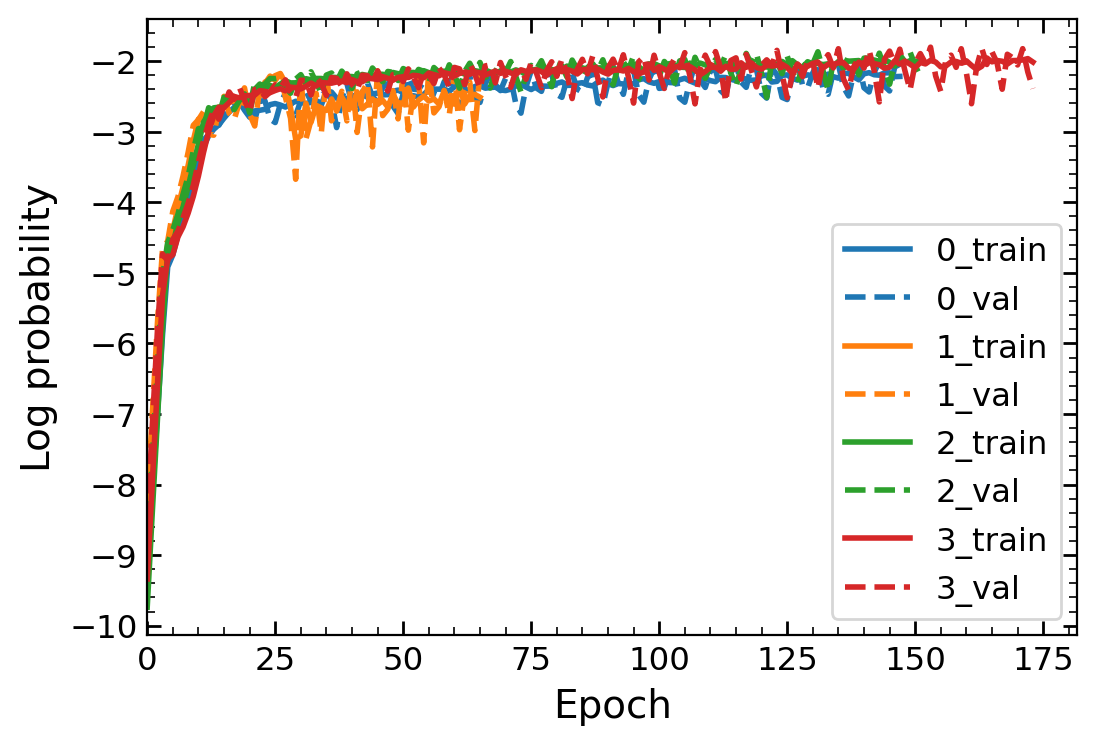

In [2]:
# Open the JSON file
with open('toy_NPE_summary.json', 'r') as f:
    # Load the data from the file
    summaries = json.load(f)
    
fig, ax = plt.subplots(1, 1, figsize=(6,4))
c = list(mcolors.TABLEAU_COLORS)
for i, m in enumerate(summaries):
    ax.plot(m['training_log_probs'], ls='-', label=f"{i}_train", c=c[i])
    ax.plot(m['validation_log_probs'], ls='--', label=f"{i}_val", c=c[i])
ax.set_xlim(0)
ax.set_xlabel('Epoch')
ax.set_ylabel('Log probability')
ax.legend()

In [3]:
path = '../../../../../../data/vgiusepp/'
labels = ['N_subhalos']
samples = {}
m = 'NPE'
with open(join('./', 'toy_NPE_posterior.pkl'), 'rb') as f:
    samples[m] = pickle.load(f)
posterior_samples = samples['NPE'].sample((5_000,), x=torch.from_numpy(np.load(path+'x_0.npy')).to('cuda'), progress=False)

TypeError: DirectPosterior.sample() got an unexpected keyword argument 'progress'

Drawing 1214 posterior samples:   0%|          | 0/1214 [00:00<?, ?it/s]

Drawing 1057 posterior samples:   0%|          | 0/1057 [00:00<?, ?it/s]

Drawing 1317 posterior samples:   0%|          | 0/1317 [00:00<?, ?it/s]

Drawing 1412 posterior samples:   0%|          | 0/1412 [00:00<?, ?it/s]

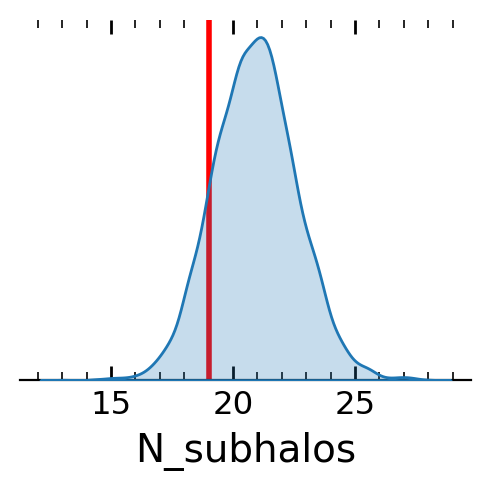

In [4]:
metric = PlotSinglePosterior(
    num_samples=5_000, sample_method='direct', 
    labels = labels,
    out_dir=None
)
fig = metric(
    posterior=samples[m],
    x_obs = torch.from_numpy(np.load(path+'x_0.npy')), theta_fid=torch.from_numpy(np.load(path+'N_subhalos_0.npy')),
)
fig.savefig('corner_2subhalos.png')

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:05<00:00, 18.58it/s]


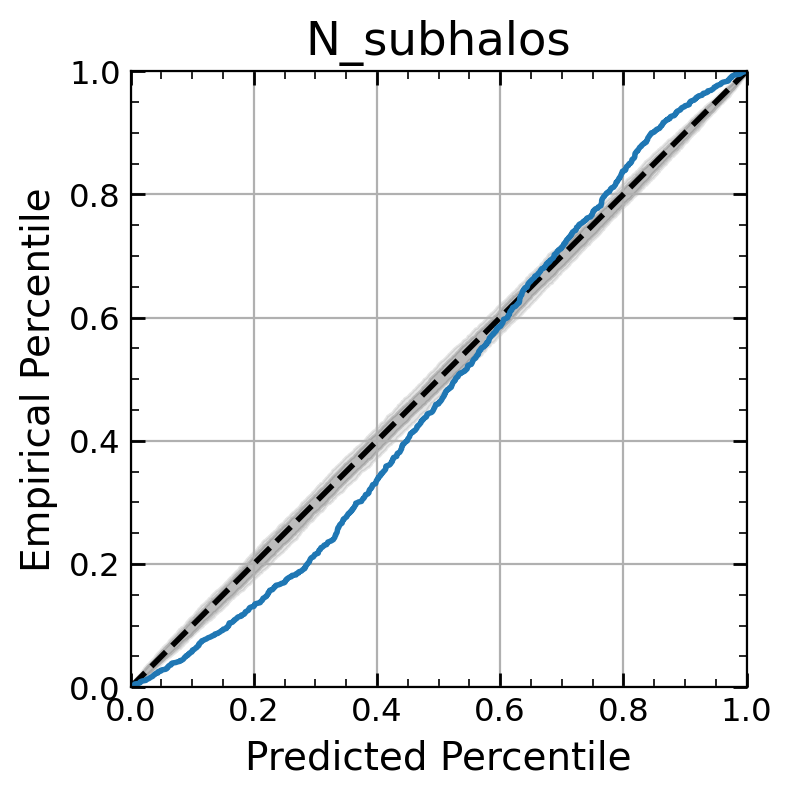

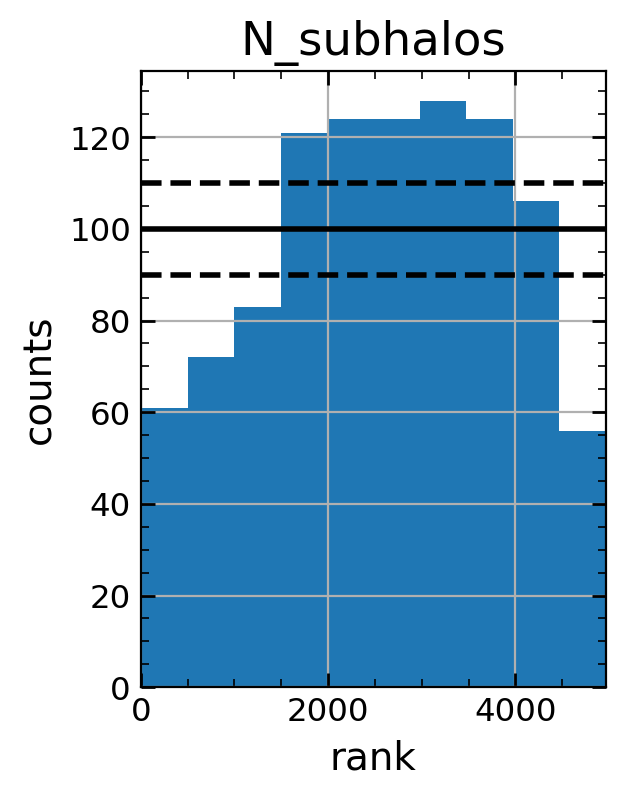

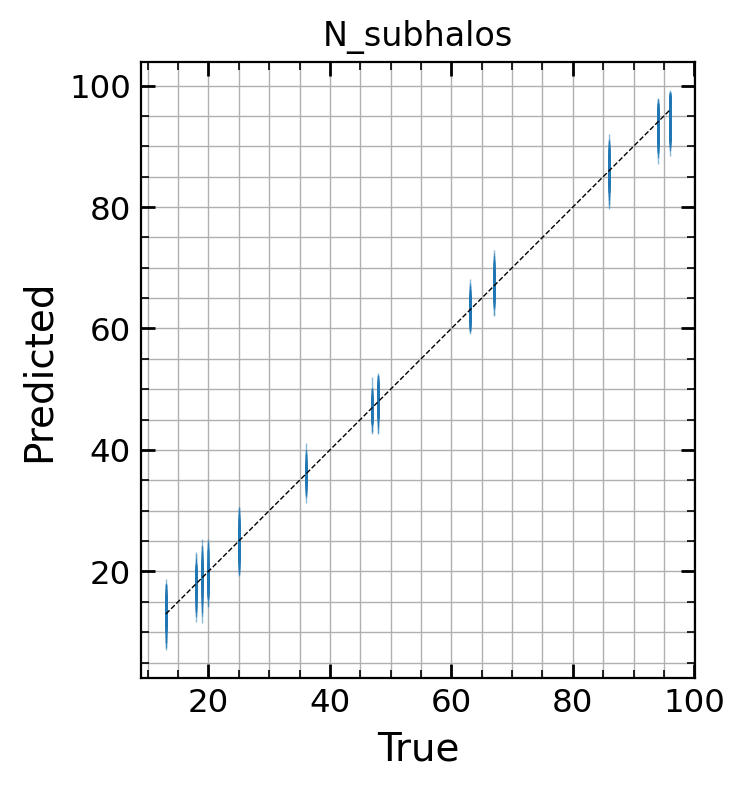

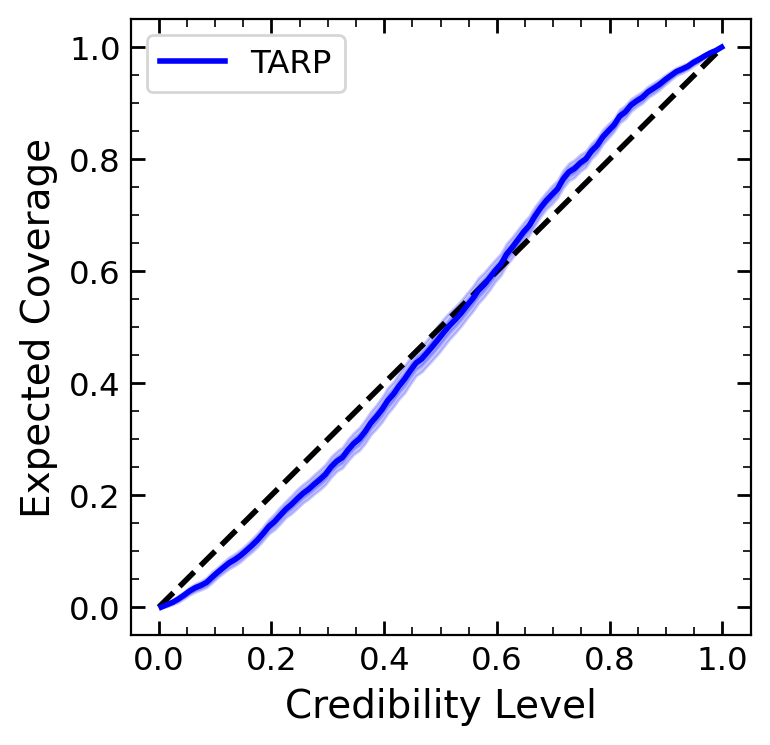

In [8]:
metric = PosteriorCoverage(
    num_samples=5000, sample_method='direct',
    labels=labels, plot_list = ["coverage", "histogram", "predictions", "tarp"]
)
fig = metric(
    posterior=samples[m],
    x=torch.from_numpy(np.load(path+'x_test.npy')), theta=torch.from_numpy(np.load(path+'N_subhalos_test.npy'))
)
fig[3].savefig('coverage_Nsubhalos.png')

In [10]:
theta_test = torch.from_numpy(np.load(path+'N_subhalos_test.npy')).to('cuda')
x_test = torch.from_numpy(np.load(path+'x_test.npy')).to('cuda')
posterior_mean = torch.zeros_like(theta_test)
posterior_std = torch.zeros_like(theta_test)
for i, x_0 in enumerate(x_test):
    posterior_mean[i] = int(samples['NPE'].sample((10_000,), x=x_0).mean(axis=0))
    posterior_std[i] = samples['NPE'].sample((10_000,), x=x_0).std(axis=0)


mre = ((theta_test - posterior_mean).abs() / theta_test.abs()).mean(axis=0)
r2 = 1 - ((theta_test - posterior_mean)**2).sum(axis=0) / ((theta_test - theta_test.mean(axis=0))**2).sum(axis=0)
mse = ((theta_test - posterior_mean)**2).mean(axis=0)
chi2 = ((theta_test - posterior_mean)**2 / posterior_std**2).mean(axis=0)



Drawing 2343 posterior samples:   0%|          | 0/2343 [00:00<?, ?it/s]

Drawing 1977 posterior samples:   0%|          | 0/1977 [00:00<?, ?it/s]

Drawing 2709 posterior samples:   0%|          | 0/2709 [00:00<?, ?it/s]

Drawing 2971 posterior samples:   0%|          | 0/2971 [00:00<?, ?it/s]

Drawing 2346 posterior samples:   0%|          | 0/2346 [00:00<?, ?it/s]

Drawing 2074 posterior samples:   0%|          | 0/2074 [00:00<?, ?it/s]

Drawing 2713 posterior samples:   0%|          | 0/2713 [00:00<?, ?it/s]

Drawing 2867 posterior samples:   0%|          | 0/2867 [00:00<?, ?it/s]

Drawing 2336 posterior samples:   0%|          | 0/2336 [00:00<?, ?it/s]

Drawing 2058 posterior samples:   0%|          | 0/2058 [00:00<?, ?it/s]

Drawing 2685 posterior samples:   0%|          | 0/2685 [00:00<?, ?it/s]

Drawing 2921 posterior samples:   0%|          | 0/2921 [00:00<?, ?it/s]

Drawing 2243 posterior samples:   0%|          | 0/2243 [00:00<?, ?it/s]

Drawing 2051 posterior samples:   0%|          | 0/2051 [00:00<?, ?it/s]

Drawing 2761 posterior samples:   0%|          | 0/2761 [00:00<?, ?it/s]

Drawing 2945 posterior samples:   0%|          | 0/2945 [00:00<?, ?it/s]

Drawing 2284 posterior samples:   0%|          | 0/2284 [00:00<?, ?it/s]

Drawing 2084 posterior samples:   0%|          | 0/2084 [00:00<?, ?it/s]

Drawing 2720 posterior samples:   0%|          | 0/2720 [00:00<?, ?it/s]

Drawing 2912 posterior samples:   0%|          | 0/2912 [00:00<?, ?it/s]

Drawing 2383 posterior samples:   0%|          | 0/2383 [00:00<?, ?it/s]

Drawing 2042 posterior samples:   0%|          | 0/2042 [00:00<?, ?it/s]

Drawing 2696 posterior samples:   0%|          | 0/2696 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2400 posterior samples:   0%|          | 0/2400 [00:00<?, ?it/s]

Drawing 2057 posterior samples:   0%|          | 0/2057 [00:00<?, ?it/s]

Drawing 2655 posterior samples:   0%|          | 0/2655 [00:00<?, ?it/s]

Drawing 2888 posterior samples:   0%|          | 0/2888 [00:00<?, ?it/s]

Drawing 2335 posterior samples:   0%|          | 0/2335 [00:00<?, ?it/s]

Drawing 2056 posterior samples:   0%|          | 0/2056 [00:00<?, ?it/s]

Drawing 2646 posterior samples:   0%|          | 0/2646 [00:00<?, ?it/s]

Drawing 2963 posterior samples:   0%|          | 0/2963 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 1967 posterior samples:   0%|          | 0/1967 [00:00<?, ?it/s]

Drawing 2663 posterior samples:   0%|          | 0/2663 [00:00<?, ?it/s]

Drawing 2984 posterior samples:   0%|          | 0/2984 [00:00<?, ?it/s]

Drawing 2357 posterior samples:   0%|          | 0/2357 [00:00<?, ?it/s]

Drawing 2095 posterior samples:   0%|          | 0/2095 [00:00<?, ?it/s]

Drawing 2650 posterior samples:   0%|          | 0/2650 [00:00<?, ?it/s]

Drawing 2898 posterior samples:   0%|          | 0/2898 [00:00<?, ?it/s]

Drawing 2327 posterior samples:   0%|          | 0/2327 [00:00<?, ?it/s]

Drawing 2033 posterior samples:   0%|          | 0/2033 [00:00<?, ?it/s]

Drawing 2732 posterior samples:   0%|          | 0/2732 [00:00<?, ?it/s]

Drawing 2908 posterior samples:   0%|          | 0/2908 [00:00<?, ?it/s]

Drawing 2360 posterior samples:   0%|          | 0/2360 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2918 posterior samples:   0%|          | 0/2918 [00:00<?, ?it/s]

Drawing 2374 posterior samples:   0%|          | 0/2374 [00:00<?, ?it/s]

Drawing 2021 posterior samples:   0%|          | 0/2021 [00:00<?, ?it/s]

Drawing 2750 posterior samples:   0%|          | 0/2750 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2394 posterior samples:   0%|          | 0/2394 [00:00<?, ?it/s]

Drawing 2077 posterior samples:   0%|          | 0/2077 [00:00<?, ?it/s]

Drawing 2649 posterior samples:   0%|          | 0/2649 [00:00<?, ?it/s]

Drawing 2880 posterior samples:   0%|          | 0/2880 [00:00<?, ?it/s]

Drawing 2345 posterior samples:   0%|          | 0/2345 [00:00<?, ?it/s]

Drawing 2085 posterior samples:   0%|          | 0/2085 [00:00<?, ?it/s]

Drawing 2681 posterior samples:   0%|          | 0/2681 [00:00<?, ?it/s]

Drawing 2889 posterior samples:   0%|          | 0/2889 [00:00<?, ?it/s]

Drawing 2381 posterior samples:   0%|          | 0/2381 [00:00<?, ?it/s]

Drawing 2101 posterior samples:   0%|          | 0/2101 [00:00<?, ?it/s]

Drawing 2657 posterior samples:   0%|          | 0/2657 [00:00<?, ?it/s]

Drawing 2861 posterior samples:   0%|          | 0/2861 [00:00<?, ?it/s]

Drawing 2334 posterior samples:   0%|          | 0/2334 [00:00<?, ?it/s]

Drawing 2072 posterior samples:   0%|          | 0/2072 [00:00<?, ?it/s]

Drawing 2718 posterior samples:   0%|          | 0/2718 [00:00<?, ?it/s]

Drawing 2876 posterior samples:   0%|          | 0/2876 [00:00<?, ?it/s]

Drawing 2357 posterior samples:   0%|          | 0/2357 [00:00<?, ?it/s]

Drawing 2041 posterior samples:   0%|          | 0/2041 [00:00<?, ?it/s]

Drawing 2755 posterior samples:   0%|          | 0/2755 [00:00<?, ?it/s]

Drawing 2847 posterior samples:   0%|          | 0/2847 [00:00<?, ?it/s]

Drawing 2421 posterior samples:   0%|          | 0/2421 [00:00<?, ?it/s]

Drawing 2078 posterior samples:   0%|          | 0/2078 [00:00<?, ?it/s]

Drawing 2688 posterior samples:   0%|          | 0/2688 [00:00<?, ?it/s]

Drawing 2813 posterior samples:   0%|          | 0/2813 [00:00<?, ?it/s]

Drawing 2374 posterior samples:   0%|          | 0/2374 [00:00<?, ?it/s]

Drawing 2075 posterior samples:   0%|          | 0/2075 [00:00<?, ?it/s]

Drawing 2720 posterior samples:   0%|          | 0/2720 [00:00<?, ?it/s]

Drawing 2831 posterior samples:   0%|          | 0/2831 [00:00<?, ?it/s]

Drawing 2338 posterior samples:   0%|          | 0/2338 [00:00<?, ?it/s]

Drawing 2058 posterior samples:   0%|          | 0/2058 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2907 posterior samples:   0%|          | 0/2907 [00:00<?, ?it/s]

Drawing 2276 posterior samples:   0%|          | 0/2276 [00:00<?, ?it/s]

Drawing 2129 posterior samples:   0%|          | 0/2129 [00:00<?, ?it/s]

Drawing 2684 posterior samples:   0%|          | 0/2684 [00:00<?, ?it/s]

Drawing 2911 posterior samples:   0%|          | 0/2911 [00:00<?, ?it/s]

Drawing 2333 posterior samples:   0%|          | 0/2333 [00:00<?, ?it/s]

Drawing 2090 posterior samples:   0%|          | 0/2090 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2902 posterior samples:   0%|          | 0/2902 [00:00<?, ?it/s]

Drawing 2362 posterior samples:   0%|          | 0/2362 [00:00<?, ?it/s]

Drawing 1942 posterior samples:   0%|          | 0/1942 [00:00<?, ?it/s]

Drawing 2767 posterior samples:   0%|          | 0/2767 [00:00<?, ?it/s]

Drawing 2929 posterior samples:   0%|          | 0/2929 [00:00<?, ?it/s]

Drawing 2389 posterior samples:   0%|          | 0/2389 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2617 posterior samples:   0%|          | 0/2617 [00:00<?, ?it/s]

Drawing 2955 posterior samples:   0%|          | 0/2955 [00:00<?, ?it/s]

Drawing 2352 posterior samples:   0%|          | 0/2352 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2682 posterior samples:   0%|          | 0/2682 [00:00<?, ?it/s]

Drawing 2878 posterior samples:   0%|          | 0/2878 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2062 posterior samples:   0%|          | 0/2062 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2356 posterior samples:   0%|          | 0/2356 [00:00<?, ?it/s]

Drawing 2098 posterior samples:   0%|          | 0/2098 [00:00<?, ?it/s]

Drawing 2657 posterior samples:   0%|          | 0/2657 [00:00<?, ?it/s]

Drawing 2889 posterior samples:   0%|          | 0/2889 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 2081 posterior samples:   0%|          | 0/2081 [00:00<?, ?it/s]

Drawing 2736 posterior samples:   0%|          | 0/2736 [00:00<?, ?it/s]

Drawing 2790 posterior samples:   0%|          | 0/2790 [00:00<?, ?it/s]

Drawing 2351 posterior samples:   0%|          | 0/2351 [00:00<?, ?it/s]

Drawing 2057 posterior samples:   0%|          | 0/2057 [00:00<?, ?it/s]

Drawing 2670 posterior samples:   0%|          | 0/2670 [00:00<?, ?it/s]

Drawing 2922 posterior samples:   0%|          | 0/2922 [00:00<?, ?it/s]

Drawing 2310 posterior samples:   0%|          | 0/2310 [00:00<?, ?it/s]

Drawing 2068 posterior samples:   0%|          | 0/2068 [00:00<?, ?it/s]

Drawing 2753 posterior samples:   0%|          | 0/2753 [00:00<?, ?it/s]

Drawing 2869 posterior samples:   0%|          | 0/2869 [00:00<?, ?it/s]

Drawing 2428 posterior samples:   0%|          | 0/2428 [00:00<?, ?it/s]

Drawing 2000 posterior samples:   0%|          | 0/2000 [00:00<?, ?it/s]

Drawing 2716 posterior samples:   0%|          | 0/2716 [00:00<?, ?it/s]

Drawing 2856 posterior samples:   0%|          | 0/2856 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2911 posterior samples:   0%|          | 0/2911 [00:00<?, ?it/s]

Drawing 2405 posterior samples:   0%|          | 0/2405 [00:00<?, ?it/s]

Drawing 2049 posterior samples:   0%|          | 0/2049 [00:00<?, ?it/s]

Drawing 2643 posterior samples:   0%|          | 0/2643 [00:00<?, ?it/s]

Drawing 2903 posterior samples:   0%|          | 0/2903 [00:00<?, ?it/s]

Drawing 2335 posterior samples:   0%|          | 0/2335 [00:00<?, ?it/s]

Drawing 2040 posterior samples:   0%|          | 0/2040 [00:00<?, ?it/s]

Drawing 2722 posterior samples:   0%|          | 0/2722 [00:00<?, ?it/s]

Drawing 2903 posterior samples:   0%|          | 0/2903 [00:00<?, ?it/s]

Drawing 2388 posterior samples:   0%|          | 0/2388 [00:00<?, ?it/s]

Drawing 2029 posterior samples:   0%|          | 0/2029 [00:00<?, ?it/s]

Drawing 2718 posterior samples:   0%|          | 0/2718 [00:00<?, ?it/s]

Drawing 2865 posterior samples:   0%|          | 0/2865 [00:00<?, ?it/s]

Drawing 2402 posterior samples:   0%|          | 0/2402 [00:00<?, ?it/s]

Drawing 2055 posterior samples:   0%|          | 0/2055 [00:00<?, ?it/s]

Drawing 2655 posterior samples:   0%|          | 0/2655 [00:00<?, ?it/s]

Drawing 2888 posterior samples:   0%|          | 0/2888 [00:00<?, ?it/s]

Drawing 2312 posterior samples:   0%|          | 0/2312 [00:00<?, ?it/s]

Drawing 2074 posterior samples:   0%|          | 0/2074 [00:00<?, ?it/s]

Drawing 2704 posterior samples:   0%|          | 0/2704 [00:00<?, ?it/s]

Drawing 2910 posterior samples:   0%|          | 0/2910 [00:00<?, ?it/s]

Drawing 2300 posterior samples:   0%|          | 0/2300 [00:00<?, ?it/s]

Drawing 2089 posterior samples:   0%|          | 0/2089 [00:00<?, ?it/s]

Drawing 2704 posterior samples:   0%|          | 0/2704 [00:00<?, ?it/s]

Drawing 2907 posterior samples:   0%|          | 0/2907 [00:00<?, ?it/s]

Drawing 2347 posterior samples:   0%|          | 0/2347 [00:00<?, ?it/s]

Drawing 2084 posterior samples:   0%|          | 0/2084 [00:00<?, ?it/s]

Drawing 2690 posterior samples:   0%|          | 0/2690 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2370 posterior samples:   0%|          | 0/2370 [00:00<?, ?it/s]

Drawing 2033 posterior samples:   0%|          | 0/2033 [00:00<?, ?it/s]

Drawing 2677 posterior samples:   0%|          | 0/2677 [00:00<?, ?it/s]

Drawing 2920 posterior samples:   0%|          | 0/2920 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2125 posterior samples:   0%|          | 0/2125 [00:00<?, ?it/s]

Drawing 2615 posterior samples:   0%|          | 0/2615 [00:00<?, ?it/s]

Drawing 2868 posterior samples:   0%|          | 0/2868 [00:00<?, ?it/s]

Drawing 2330 posterior samples:   0%|          | 0/2330 [00:00<?, ?it/s]

Drawing 2033 posterior samples:   0%|          | 0/2033 [00:00<?, ?it/s]

Drawing 2746 posterior samples:   0%|          | 0/2746 [00:00<?, ?it/s]

Drawing 2891 posterior samples:   0%|          | 0/2891 [00:00<?, ?it/s]

Drawing 2406 posterior samples:   0%|          | 0/2406 [00:00<?, ?it/s]

Drawing 2008 posterior samples:   0%|          | 0/2008 [00:00<?, ?it/s]

Drawing 2728 posterior samples:   0%|          | 0/2728 [00:00<?, ?it/s]

Drawing 2858 posterior samples:   0%|          | 0/2858 [00:00<?, ?it/s]

Drawing 2351 posterior samples:   0%|          | 0/2351 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2708 posterior samples:   0%|          | 0/2708 [00:00<?, ?it/s]

Drawing 2880 posterior samples:   0%|          | 0/2880 [00:00<?, ?it/s]

Drawing 2326 posterior samples:   0%|          | 0/2326 [00:00<?, ?it/s]

Drawing 2093 posterior samples:   0%|          | 0/2093 [00:00<?, ?it/s]

Drawing 2633 posterior samples:   0%|          | 0/2633 [00:00<?, ?it/s]

Drawing 2948 posterior samples:   0%|          | 0/2948 [00:00<?, ?it/s]

Drawing 2338 posterior samples:   0%|          | 0/2338 [00:00<?, ?it/s]

Drawing 2033 posterior samples:   0%|          | 0/2033 [00:00<?, ?it/s]

Drawing 2771 posterior samples:   0%|          | 0/2771 [00:00<?, ?it/s]

Drawing 2858 posterior samples:   0%|          | 0/2858 [00:00<?, ?it/s]

Drawing 2398 posterior samples:   0%|          | 0/2398 [00:00<?, ?it/s]

Drawing 2109 posterior samples:   0%|          | 0/2109 [00:00<?, ?it/s]

Drawing 2683 posterior samples:   0%|          | 0/2683 [00:00<?, ?it/s]

Drawing 2810 posterior samples:   0%|          | 0/2810 [00:00<?, ?it/s]

Drawing 2389 posterior samples:   0%|          | 0/2389 [00:00<?, ?it/s]

Drawing 2092 posterior samples:   0%|          | 0/2092 [00:00<?, ?it/s]

Drawing 2712 posterior samples:   0%|          | 0/2712 [00:00<?, ?it/s]

Drawing 2807 posterior samples:   0%|          | 0/2807 [00:00<?, ?it/s]

Drawing 2347 posterior samples:   0%|          | 0/2347 [00:00<?, ?it/s]

Drawing 2075 posterior samples:   0%|          | 0/2075 [00:00<?, ?it/s]

Drawing 2715 posterior samples:   0%|          | 0/2715 [00:00<?, ?it/s]

Drawing 2863 posterior samples:   0%|          | 0/2863 [00:00<?, ?it/s]

Drawing 2317 posterior samples:   0%|          | 0/2317 [00:00<?, ?it/s]

Drawing 2018 posterior samples:   0%|          | 0/2018 [00:00<?, ?it/s]

Drawing 2641 posterior samples:   0%|          | 0/2641 [00:00<?, ?it/s]

Drawing 3024 posterior samples:   0%|          | 0/3024 [00:00<?, ?it/s]

Drawing 2367 posterior samples:   0%|          | 0/2367 [00:00<?, ?it/s]

Drawing 2049 posterior samples:   0%|          | 0/2049 [00:00<?, ?it/s]

Drawing 2684 posterior samples:   0%|          | 0/2684 [00:00<?, ?it/s]

Drawing 2900 posterior samples:   0%|          | 0/2900 [00:00<?, ?it/s]

Drawing 2318 posterior samples:   0%|          | 0/2318 [00:00<?, ?it/s]

Drawing 2134 posterior samples:   0%|          | 0/2134 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2851 posterior samples:   0%|          | 0/2851 [00:00<?, ?it/s]

Drawing 2340 posterior samples:   0%|          | 0/2340 [00:00<?, ?it/s]

Drawing 2085 posterior samples:   0%|          | 0/2085 [00:00<?, ?it/s]

Drawing 2667 posterior samples:   0%|          | 0/2667 [00:00<?, ?it/s]

Drawing 2908 posterior samples:   0%|          | 0/2908 [00:00<?, ?it/s]

Drawing 2367 posterior samples:   0%|          | 0/2367 [00:00<?, ?it/s]

Drawing 2080 posterior samples:   0%|          | 0/2080 [00:00<?, ?it/s]

Drawing 2735 posterior samples:   0%|          | 0/2735 [00:00<?, ?it/s]

Drawing 2818 posterior samples:   0%|          | 0/2818 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2032 posterior samples:   0%|          | 0/2032 [00:00<?, ?it/s]

Drawing 2714 posterior samples:   0%|          | 0/2714 [00:00<?, ?it/s]

Drawing 2886 posterior samples:   0%|          | 0/2886 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2032 posterior samples:   0%|          | 0/2032 [00:00<?, ?it/s]

Drawing 2754 posterior samples:   0%|          | 0/2754 [00:00<?, ?it/s]

Drawing 2841 posterior samples:   0%|          | 0/2841 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2032 posterior samples:   0%|          | 0/2032 [00:00<?, ?it/s]

Drawing 2607 posterior samples:   0%|          | 0/2607 [00:00<?, ?it/s]

Drawing 2993 posterior samples:   0%|          | 0/2993 [00:00<?, ?it/s]

Drawing 2353 posterior samples:   0%|          | 0/2353 [00:00<?, ?it/s]

Drawing 2079 posterior samples:   0%|          | 0/2079 [00:00<?, ?it/s]

Drawing 2729 posterior samples:   0%|          | 0/2729 [00:00<?, ?it/s]

Drawing 2839 posterior samples:   0%|          | 0/2839 [00:00<?, ?it/s]

Drawing 2319 posterior samples:   0%|          | 0/2319 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2803 posterior samples:   0%|          | 0/2803 [00:00<?, ?it/s]

Drawing 2832 posterior samples:   0%|          | 0/2832 [00:00<?, ?it/s]

Drawing 2420 posterior samples:   0%|          | 0/2420 [00:00<?, ?it/s]

Drawing 2023 posterior samples:   0%|          | 0/2023 [00:00<?, ?it/s]

Drawing 2671 posterior samples:   0%|          | 0/2671 [00:00<?, ?it/s]

Drawing 2886 posterior samples:   0%|          | 0/2886 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2051 posterior samples:   0%|          | 0/2051 [00:00<?, ?it/s]

Drawing 2702 posterior samples:   0%|          | 0/2702 [00:00<?, ?it/s]

Drawing 2874 posterior samples:   0%|          | 0/2874 [00:00<?, ?it/s]

Drawing 2346 posterior samples:   0%|          | 0/2346 [00:00<?, ?it/s]

Drawing 2072 posterior samples:   0%|          | 0/2072 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2907 posterior samples:   0%|          | 0/2907 [00:00<?, ?it/s]

Drawing 2344 posterior samples:   0%|          | 0/2344 [00:00<?, ?it/s]

Drawing 2028 posterior samples:   0%|          | 0/2028 [00:00<?, ?it/s]

Drawing 2776 posterior samples:   0%|          | 0/2776 [00:00<?, ?it/s]

Drawing 2852 posterior samples:   0%|          | 0/2852 [00:00<?, ?it/s]

Drawing 2299 posterior samples:   0%|          | 0/2299 [00:00<?, ?it/s]

Drawing 2114 posterior samples:   0%|          | 0/2114 [00:00<?, ?it/s]

Drawing 2728 posterior samples:   0%|          | 0/2728 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2384 posterior samples:   0%|          | 0/2384 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2895 posterior samples:   0%|          | 0/2895 [00:00<?, ?it/s]

Drawing 2309 posterior samples:   0%|          | 0/2309 [00:00<?, ?it/s]

Drawing 2072 posterior samples:   0%|          | 0/2072 [00:00<?, ?it/s]

Drawing 2760 posterior samples:   0%|          | 0/2760 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2023 posterior samples:   0%|          | 0/2023 [00:00<?, ?it/s]

Drawing 2731 posterior samples:   0%|          | 0/2731 [00:00<?, ?it/s]

Drawing 2909 posterior samples:   0%|          | 0/2909 [00:00<?, ?it/s]

Drawing 2385 posterior samples:   0%|          | 0/2385 [00:00<?, ?it/s]

Drawing 2067 posterior samples:   0%|          | 0/2067 [00:00<?, ?it/s]

Drawing 2718 posterior samples:   0%|          | 0/2718 [00:00<?, ?it/s]

Drawing 2830 posterior samples:   0%|          | 0/2830 [00:00<?, ?it/s]

Drawing 2329 posterior samples:   0%|          | 0/2329 [00:00<?, ?it/s]

Drawing 2075 posterior samples:   0%|          | 0/2075 [00:00<?, ?it/s]

Drawing 2652 posterior samples:   0%|          | 0/2652 [00:00<?, ?it/s]

Drawing 2944 posterior samples:   0%|          | 0/2944 [00:00<?, ?it/s]

Drawing 2257 posterior samples:   0%|          | 0/2257 [00:00<?, ?it/s]

Drawing 2051 posterior samples:   0%|          | 0/2051 [00:00<?, ?it/s]

Drawing 2723 posterior samples:   0%|          | 0/2723 [00:00<?, ?it/s]

Drawing 2969 posterior samples:   0%|          | 0/2969 [00:00<?, ?it/s]

Drawing 2284 posterior samples:   0%|          | 0/2284 [00:00<?, ?it/s]

Drawing 2049 posterior samples:   0%|          | 0/2049 [00:00<?, ?it/s]

Drawing 2758 posterior samples:   0%|          | 0/2758 [00:00<?, ?it/s]

Drawing 2909 posterior samples:   0%|          | 0/2909 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 2102 posterior samples:   0%|          | 0/2102 [00:00<?, ?it/s]

Drawing 2689 posterior samples:   0%|          | 0/2689 [00:00<?, ?it/s]

Drawing 2806 posterior samples:   0%|          | 0/2806 [00:00<?, ?it/s]

Drawing 2363 posterior samples:   0%|          | 0/2363 [00:00<?, ?it/s]

Drawing 2003 posterior samples:   0%|          | 0/2003 [00:00<?, ?it/s]

Drawing 2682 posterior samples:   0%|          | 0/2682 [00:00<?, ?it/s]

Drawing 2952 posterior samples:   0%|          | 0/2952 [00:00<?, ?it/s]

Drawing 2348 posterior samples:   0%|          | 0/2348 [00:00<?, ?it/s]

Drawing 2073 posterior samples:   0%|          | 0/2073 [00:00<?, ?it/s]

Drawing 2687 posterior samples:   0%|          | 0/2687 [00:00<?, ?it/s]

Drawing 2892 posterior samples:   0%|          | 0/2892 [00:00<?, ?it/s]

Drawing 2419 posterior samples:   0%|          | 0/2419 [00:00<?, ?it/s]

Drawing 2101 posterior samples:   0%|          | 0/2101 [00:00<?, ?it/s]

Drawing 2635 posterior samples:   0%|          | 0/2635 [00:00<?, ?it/s]

Drawing 2845 posterior samples:   0%|          | 0/2845 [00:00<?, ?it/s]

Drawing 2427 posterior samples:   0%|          | 0/2427 [00:00<?, ?it/s]

Drawing 2035 posterior samples:   0%|          | 0/2035 [00:00<?, ?it/s]

Drawing 2671 posterior samples:   0%|          | 0/2671 [00:00<?, ?it/s]

Drawing 2867 posterior samples:   0%|          | 0/2867 [00:00<?, ?it/s]

Drawing 2364 posterior samples:   0%|          | 0/2364 [00:00<?, ?it/s]

Drawing 2091 posterior samples:   0%|          | 0/2091 [00:00<?, ?it/s]

Drawing 2683 posterior samples:   0%|          | 0/2683 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2360 posterior samples:   0%|          | 0/2360 [00:00<?, ?it/s]

Drawing 2018 posterior samples:   0%|          | 0/2018 [00:00<?, ?it/s]

Drawing 2665 posterior samples:   0%|          | 0/2665 [00:00<?, ?it/s]

Drawing 2957 posterior samples:   0%|          | 0/2957 [00:00<?, ?it/s]

Drawing 2359 posterior samples:   0%|          | 0/2359 [00:00<?, ?it/s]

Drawing 2121 posterior samples:   0%|          | 0/2121 [00:00<?, ?it/s]

Drawing 2649 posterior samples:   0%|          | 0/2649 [00:00<?, ?it/s]

Drawing 2871 posterior samples:   0%|          | 0/2871 [00:00<?, ?it/s]

Drawing 2381 posterior samples:   0%|          | 0/2381 [00:00<?, ?it/s]

Drawing 2075 posterior samples:   0%|          | 0/2075 [00:00<?, ?it/s]

Drawing 2688 posterior samples:   0%|          | 0/2688 [00:00<?, ?it/s]

Drawing 2856 posterior samples:   0%|          | 0/2856 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2026 posterior samples:   0%|          | 0/2026 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2910 posterior samples:   0%|          | 0/2910 [00:00<?, ?it/s]

Drawing 2374 posterior samples:   0%|          | 0/2374 [00:00<?, ?it/s]

Drawing 1981 posterior samples:   0%|          | 0/1981 [00:00<?, ?it/s]

Drawing 2734 posterior samples:   0%|          | 0/2734 [00:00<?, ?it/s]

Drawing 2911 posterior samples:   0%|          | 0/2911 [00:00<?, ?it/s]

Drawing 2314 posterior samples:   0%|          | 0/2314 [00:00<?, ?it/s]

Drawing 2071 posterior samples:   0%|          | 0/2071 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2940 posterior samples:   0%|          | 0/2940 [00:00<?, ?it/s]

Drawing 2460 posterior samples:   0%|          | 0/2460 [00:00<?, ?it/s]

Drawing 2010 posterior samples:   0%|          | 0/2010 [00:00<?, ?it/s]

Drawing 2649 posterior samples:   0%|          | 0/2649 [00:00<?, ?it/s]

Drawing 2881 posterior samples:   0%|          | 0/2881 [00:00<?, ?it/s]

Drawing 2370 posterior samples:   0%|          | 0/2370 [00:00<?, ?it/s]

Drawing 2112 posterior samples:   0%|          | 0/2112 [00:00<?, ?it/s]

Drawing 2645 posterior samples:   0%|          | 0/2645 [00:00<?, ?it/s]

Drawing 2873 posterior samples:   0%|          | 0/2873 [00:00<?, ?it/s]

Drawing 2389 posterior samples:   0%|          | 0/2389 [00:00<?, ?it/s]

Drawing 1946 posterior samples:   0%|          | 0/1946 [00:00<?, ?it/s]

Drawing 2746 posterior samples:   0%|          | 0/2746 [00:00<?, ?it/s]

Drawing 2919 posterior samples:   0%|          | 0/2919 [00:00<?, ?it/s]

Drawing 2377 posterior samples:   0%|          | 0/2377 [00:00<?, ?it/s]

Drawing 2096 posterior samples:   0%|          | 0/2096 [00:00<?, ?it/s]

Drawing 2729 posterior samples:   0%|          | 0/2729 [00:00<?, ?it/s]

Drawing 2798 posterior samples:   0%|          | 0/2798 [00:00<?, ?it/s]

Drawing 2400 posterior samples:   0%|          | 0/2400 [00:00<?, ?it/s]

Drawing 2019 posterior samples:   0%|          | 0/2019 [00:00<?, ?it/s]

Drawing 2713 posterior samples:   0%|          | 0/2713 [00:00<?, ?it/s]

Drawing 2868 posterior samples:   0%|          | 0/2868 [00:00<?, ?it/s]

Drawing 2318 posterior samples:   0%|          | 0/2318 [00:00<?, ?it/s]

Drawing 2013 posterior samples:   0%|          | 0/2013 [00:00<?, ?it/s]

Drawing 2753 posterior samples:   0%|          | 0/2753 [00:00<?, ?it/s]

Drawing 2916 posterior samples:   0%|          | 0/2916 [00:00<?, ?it/s]

Drawing 2401 posterior samples:   0%|          | 0/2401 [00:00<?, ?it/s]

Drawing 2152 posterior samples:   0%|          | 0/2152 [00:00<?, ?it/s]

Drawing 2695 posterior samples:   0%|          | 0/2695 [00:00<?, ?it/s]

Drawing 2752 posterior samples:   0%|          | 0/2752 [00:00<?, ?it/s]

Drawing 2376 posterior samples:   0%|          | 0/2376 [00:00<?, ?it/s]

Drawing 2032 posterior samples:   0%|          | 0/2032 [00:00<?, ?it/s]

Drawing 2702 posterior samples:   0%|          | 0/2702 [00:00<?, ?it/s]

Drawing 2890 posterior samples:   0%|          | 0/2890 [00:00<?, ?it/s]

Drawing 2350 posterior samples:   0%|          | 0/2350 [00:00<?, ?it/s]

Drawing 2058 posterior samples:   0%|          | 0/2058 [00:00<?, ?it/s]

Drawing 2708 posterior samples:   0%|          | 0/2708 [00:00<?, ?it/s]

Drawing 2884 posterior samples:   0%|          | 0/2884 [00:00<?, ?it/s]

Drawing 2305 posterior samples:   0%|          | 0/2305 [00:00<?, ?it/s]

Drawing 2050 posterior samples:   0%|          | 0/2050 [00:00<?, ?it/s]

Drawing 2756 posterior samples:   0%|          | 0/2756 [00:00<?, ?it/s]

Drawing 2889 posterior samples:   0%|          | 0/2889 [00:00<?, ?it/s]

Drawing 2352 posterior samples:   0%|          | 0/2352 [00:00<?, ?it/s]

Drawing 2020 posterior samples:   0%|          | 0/2020 [00:00<?, ?it/s]

Drawing 2741 posterior samples:   0%|          | 0/2741 [00:00<?, ?it/s]

Drawing 2887 posterior samples:   0%|          | 0/2887 [00:00<?, ?it/s]

Drawing 2292 posterior samples:   0%|          | 0/2292 [00:00<?, ?it/s]

Drawing 2052 posterior samples:   0%|          | 0/2052 [00:00<?, ?it/s]

Drawing 2657 posterior samples:   0%|          | 0/2657 [00:00<?, ?it/s]

Drawing 2999 posterior samples:   0%|          | 0/2999 [00:00<?, ?it/s]

Drawing 2271 posterior samples:   0%|          | 0/2271 [00:00<?, ?it/s]

Drawing 2118 posterior samples:   0%|          | 0/2118 [00:00<?, ?it/s]

Drawing 2644 posterior samples:   0%|          | 0/2644 [00:00<?, ?it/s]

Drawing 2967 posterior samples:   0%|          | 0/2967 [00:00<?, ?it/s]

Drawing 2342 posterior samples:   0%|          | 0/2342 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2671 posterior samples:   0%|          | 0/2671 [00:00<?, ?it/s]

Drawing 2940 posterior samples:   0%|          | 0/2940 [00:00<?, ?it/s]

Drawing 2358 posterior samples:   0%|          | 0/2358 [00:00<?, ?it/s]

Drawing 2092 posterior samples:   0%|          | 0/2092 [00:00<?, ?it/s]

Drawing 2717 posterior samples:   0%|          | 0/2717 [00:00<?, ?it/s]

Drawing 2833 posterior samples:   0%|          | 0/2833 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2031 posterior samples:   0%|          | 0/2031 [00:00<?, ?it/s]

Drawing 2724 posterior samples:   0%|          | 0/2724 [00:00<?, ?it/s]

Drawing 2853 posterior samples:   0%|          | 0/2853 [00:00<?, ?it/s]

Drawing 2272 posterior samples:   0%|          | 0/2272 [00:00<?, ?it/s]

Drawing 2139 posterior samples:   0%|          | 0/2139 [00:00<?, ?it/s]

Drawing 2648 posterior samples:   0%|          | 0/2648 [00:00<?, ?it/s]

Drawing 2941 posterior samples:   0%|          | 0/2941 [00:00<?, ?it/s]

Drawing 2364 posterior samples:   0%|          | 0/2364 [00:00<?, ?it/s]

Drawing 2071 posterior samples:   0%|          | 0/2071 [00:00<?, ?it/s]

Drawing 2686 posterior samples:   0%|          | 0/2686 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2408 posterior samples:   0%|          | 0/2408 [00:00<?, ?it/s]

Drawing 2064 posterior samples:   0%|          | 0/2064 [00:00<?, ?it/s]

Drawing 2734 posterior samples:   0%|          | 0/2734 [00:00<?, ?it/s]

Drawing 2794 posterior samples:   0%|          | 0/2794 [00:00<?, ?it/s]

Drawing 2396 posterior samples:   0%|          | 0/2396 [00:00<?, ?it/s]

Drawing 2022 posterior samples:   0%|          | 0/2022 [00:00<?, ?it/s]

Drawing 2703 posterior samples:   0%|          | 0/2703 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2360 posterior samples:   0%|          | 0/2360 [00:00<?, ?it/s]

Drawing 2005 posterior samples:   0%|          | 0/2005 [00:00<?, ?it/s]

Drawing 2757 posterior samples:   0%|          | 0/2757 [00:00<?, ?it/s]

Drawing 2878 posterior samples:   0%|          | 0/2878 [00:00<?, ?it/s]

Drawing 2354 posterior samples:   0%|          | 0/2354 [00:00<?, ?it/s]

Drawing 2015 posterior samples:   0%|          | 0/2015 [00:00<?, ?it/s]

Drawing 2772 posterior samples:   0%|          | 0/2772 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2357 posterior samples:   0%|          | 0/2357 [00:00<?, ?it/s]

Drawing 2095 posterior samples:   0%|          | 0/2095 [00:00<?, ?it/s]

Drawing 2720 posterior samples:   0%|          | 0/2720 [00:00<?, ?it/s]

Drawing 2828 posterior samples:   0%|          | 0/2828 [00:00<?, ?it/s]

Drawing 2347 posterior samples:   0%|          | 0/2347 [00:00<?, ?it/s]

Drawing 2143 posterior samples:   0%|          | 0/2143 [00:00<?, ?it/s]

Drawing 2648 posterior samples:   0%|          | 0/2648 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2324 posterior samples:   0%|          | 0/2324 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2704 posterior samples:   0%|          | 0/2704 [00:00<?, ?it/s]

Drawing 2902 posterior samples:   0%|          | 0/2902 [00:00<?, ?it/s]

Drawing 2401 posterior samples:   0%|          | 0/2401 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2639 posterior samples:   0%|          | 0/2639 [00:00<?, ?it/s]

Drawing 2913 posterior samples:   0%|          | 0/2913 [00:00<?, ?it/s]

Drawing 2345 posterior samples:   0%|          | 0/2345 [00:00<?, ?it/s]

Drawing 2113 posterior samples:   0%|          | 0/2113 [00:00<?, ?it/s]

Drawing 2602 posterior samples:   0%|          | 0/2602 [00:00<?, ?it/s]

Drawing 2940 posterior samples:   0%|          | 0/2940 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 2071 posterior samples:   0%|          | 0/2071 [00:00<?, ?it/s]

Drawing 2634 posterior samples:   0%|          | 0/2634 [00:00<?, ?it/s]

Drawing 2892 posterior samples:   0%|          | 0/2892 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 1998 posterior samples:   0%|          | 0/1998 [00:00<?, ?it/s]

Drawing 2728 posterior samples:   0%|          | 0/2728 [00:00<?, ?it/s]

Drawing 2908 posterior samples:   0%|          | 0/2908 [00:00<?, ?it/s]

Drawing 2321 posterior samples:   0%|          | 0/2321 [00:00<?, ?it/s]

Drawing 2121 posterior samples:   0%|          | 0/2121 [00:00<?, ?it/s]

Drawing 2794 posterior samples:   0%|          | 0/2794 [00:00<?, ?it/s]

Drawing 2764 posterior samples:   0%|          | 0/2764 [00:00<?, ?it/s]

Drawing 2382 posterior samples:   0%|          | 0/2382 [00:00<?, ?it/s]

Drawing 2078 posterior samples:   0%|          | 0/2078 [00:00<?, ?it/s]

Drawing 2681 posterior samples:   0%|          | 0/2681 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2391 posterior samples:   0%|          | 0/2391 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2742 posterior samples:   0%|          | 0/2742 [00:00<?, ?it/s]

Drawing 2828 posterior samples:   0%|          | 0/2828 [00:00<?, ?it/s]

Drawing 2291 posterior samples:   0%|          | 0/2291 [00:00<?, ?it/s]

Drawing 2077 posterior samples:   0%|          | 0/2077 [00:00<?, ?it/s]

Drawing 2732 posterior samples:   0%|          | 0/2732 [00:00<?, ?it/s]

Drawing 2900 posterior samples:   0%|          | 0/2900 [00:00<?, ?it/s]

Drawing 2378 posterior samples:   0%|          | 0/2378 [00:00<?, ?it/s]

Drawing 1993 posterior samples:   0%|          | 0/1993 [00:00<?, ?it/s]

Drawing 2679 posterior samples:   0%|          | 0/2679 [00:00<?, ?it/s]

Drawing 2950 posterior samples:   0%|          | 0/2950 [00:00<?, ?it/s]

Drawing 2458 posterior samples:   0%|          | 0/2458 [00:00<?, ?it/s]

Drawing 2072 posterior samples:   0%|          | 0/2072 [00:00<?, ?it/s]

Drawing 2625 posterior samples:   0%|          | 0/2625 [00:00<?, ?it/s]

Drawing 2845 posterior samples:   0%|          | 0/2845 [00:00<?, ?it/s]

Drawing 2227 posterior samples:   0%|          | 0/2227 [00:00<?, ?it/s]

Drawing 2152 posterior samples:   0%|          | 0/2152 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2930 posterior samples:   0%|          | 0/2930 [00:00<?, ?it/s]

Drawing 2372 posterior samples:   0%|          | 0/2372 [00:00<?, ?it/s]

Drawing 2020 posterior samples:   0%|          | 0/2020 [00:00<?, ?it/s]

Drawing 2717 posterior samples:   0%|          | 0/2717 [00:00<?, ?it/s]

Drawing 2891 posterior samples:   0%|          | 0/2891 [00:00<?, ?it/s]

Drawing 2342 posterior samples:   0%|          | 0/2342 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2918 posterior samples:   0%|          | 0/2918 [00:00<?, ?it/s]

Drawing 2325 posterior samples:   0%|          | 0/2325 [00:00<?, ?it/s]

Drawing 2030 posterior samples:   0%|          | 0/2030 [00:00<?, ?it/s]

Drawing 2722 posterior samples:   0%|          | 0/2722 [00:00<?, ?it/s]

Drawing 2923 posterior samples:   0%|          | 0/2923 [00:00<?, ?it/s]

Drawing 2346 posterior samples:   0%|          | 0/2346 [00:00<?, ?it/s]

Drawing 1999 posterior samples:   0%|          | 0/1999 [00:00<?, ?it/s]

Drawing 2694 posterior samples:   0%|          | 0/2694 [00:00<?, ?it/s]

Drawing 2961 posterior samples:   0%|          | 0/2961 [00:00<?, ?it/s]

Drawing 2436 posterior samples:   0%|          | 0/2436 [00:00<?, ?it/s]

Drawing 2013 posterior samples:   0%|          | 0/2013 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2845 posterior samples:   0%|          | 0/2845 [00:00<?, ?it/s]

Drawing 2346 posterior samples:   0%|          | 0/2346 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2945 posterior samples:   0%|          | 0/2945 [00:00<?, ?it/s]

Drawing 2385 posterior samples:   0%|          | 0/2385 [00:00<?, ?it/s]

Drawing 2087 posterior samples:   0%|          | 0/2087 [00:00<?, ?it/s]

Drawing 2711 posterior samples:   0%|          | 0/2711 [00:00<?, ?it/s]

Drawing 2817 posterior samples:   0%|          | 0/2817 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2110 posterior samples:   0%|          | 0/2110 [00:00<?, ?it/s]

Drawing 2680 posterior samples:   0%|          | 0/2680 [00:00<?, ?it/s]

Drawing 2873 posterior samples:   0%|          | 0/2873 [00:00<?, ?it/s]

Drawing 2314 posterior samples:   0%|          | 0/2314 [00:00<?, ?it/s]

Drawing 2050 posterior samples:   0%|          | 0/2050 [00:00<?, ?it/s]

Drawing 2774 posterior samples:   0%|          | 0/2774 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2294 posterior samples:   0%|          | 0/2294 [00:00<?, ?it/s]

Drawing 2041 posterior samples:   0%|          | 0/2041 [00:00<?, ?it/s]

Drawing 2779 posterior samples:   0%|          | 0/2779 [00:00<?, ?it/s]

Drawing 2886 posterior samples:   0%|          | 0/2886 [00:00<?, ?it/s]

Drawing 2428 posterior samples:   0%|          | 0/2428 [00:00<?, ?it/s]

Drawing 2026 posterior samples:   0%|          | 0/2026 [00:00<?, ?it/s]

Drawing 2618 posterior samples:   0%|          | 0/2618 [00:00<?, ?it/s]

Drawing 2928 posterior samples:   0%|          | 0/2928 [00:00<?, ?it/s]

Drawing 2424 posterior samples:   0%|          | 0/2424 [00:00<?, ?it/s]

Drawing 2004 posterior samples:   0%|          | 0/2004 [00:00<?, ?it/s]

Drawing 2713 posterior samples:   0%|          | 0/2713 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2440 posterior samples:   0%|          | 0/2440 [00:00<?, ?it/s]

Drawing 2055 posterior samples:   0%|          | 0/2055 [00:00<?, ?it/s]

Drawing 2694 posterior samples:   0%|          | 0/2694 [00:00<?, ?it/s]

Drawing 2811 posterior samples:   0%|          | 0/2811 [00:00<?, ?it/s]

Drawing 2384 posterior samples:   0%|          | 0/2384 [00:00<?, ?it/s]

Drawing 2054 posterior samples:   0%|          | 0/2054 [00:00<?, ?it/s]

Drawing 2609 posterior samples:   0%|          | 0/2609 [00:00<?, ?it/s]

Drawing 2953 posterior samples:   0%|          | 0/2953 [00:00<?, ?it/s]

Drawing 2350 posterior samples:   0%|          | 0/2350 [00:00<?, ?it/s]

Drawing 2037 posterior samples:   0%|          | 0/2037 [00:00<?, ?it/s]

Drawing 2768 posterior samples:   0%|          | 0/2768 [00:00<?, ?it/s]

Drawing 2845 posterior samples:   0%|          | 0/2845 [00:00<?, ?it/s]

Drawing 2361 posterior samples:   0%|          | 0/2361 [00:00<?, ?it/s]

Drawing 2008 posterior samples:   0%|          | 0/2008 [00:00<?, ?it/s]

Drawing 2789 posterior samples:   0%|          | 0/2789 [00:00<?, ?it/s]

Drawing 2842 posterior samples:   0%|          | 0/2842 [00:00<?, ?it/s]

Drawing 2344 posterior samples:   0%|          | 0/2344 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2889 posterior samples:   0%|          | 0/2889 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2841 posterior samples:   0%|          | 0/2841 [00:00<?, ?it/s]

Drawing 2335 posterior samples:   0%|          | 0/2335 [00:00<?, ?it/s]

Drawing 2153 posterior samples:   0%|          | 0/2153 [00:00<?, ?it/s]

Drawing 2710 posterior samples:   0%|          | 0/2710 [00:00<?, ?it/s]

Drawing 2802 posterior samples:   0%|          | 0/2802 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2077 posterior samples:   0%|          | 0/2077 [00:00<?, ?it/s]

Drawing 2687 posterior samples:   0%|          | 0/2687 [00:00<?, ?it/s]

Drawing 2868 posterior samples:   0%|          | 0/2868 [00:00<?, ?it/s]

Drawing 2259 posterior samples:   0%|          | 0/2259 [00:00<?, ?it/s]

Drawing 2087 posterior samples:   0%|          | 0/2087 [00:00<?, ?it/s]

Drawing 2786 posterior samples:   0%|          | 0/2786 [00:00<?, ?it/s]

Drawing 2868 posterior samples:   0%|          | 0/2868 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2095 posterior samples:   0%|          | 0/2095 [00:00<?, ?it/s]

Drawing 2737 posterior samples:   0%|          | 0/2737 [00:00<?, ?it/s]

Drawing 2795 posterior samples:   0%|          | 0/2795 [00:00<?, ?it/s]

Drawing 2355 posterior samples:   0%|          | 0/2355 [00:00<?, ?it/s]

Drawing 2028 posterior samples:   0%|          | 0/2028 [00:00<?, ?it/s]

Drawing 2753 posterior samples:   0%|          | 0/2753 [00:00<?, ?it/s]

Drawing 2864 posterior samples:   0%|          | 0/2864 [00:00<?, ?it/s]

Drawing 2375 posterior samples:   0%|          | 0/2375 [00:00<?, ?it/s]

Drawing 2065 posterior samples:   0%|          | 0/2065 [00:00<?, ?it/s]

Drawing 2695 posterior samples:   0%|          | 0/2695 [00:00<?, ?it/s]

Drawing 2865 posterior samples:   0%|          | 0/2865 [00:00<?, ?it/s]

Drawing 2412 posterior samples:   0%|          | 0/2412 [00:00<?, ?it/s]

Drawing 2115 posterior samples:   0%|          | 0/2115 [00:00<?, ?it/s]

Drawing 2548 posterior samples:   0%|          | 0/2548 [00:00<?, ?it/s]

Drawing 2925 posterior samples:   0%|          | 0/2925 [00:00<?, ?it/s]

Drawing 2371 posterior samples:   0%|          | 0/2371 [00:00<?, ?it/s]

Drawing 2084 posterior samples:   0%|          | 0/2084 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2870 posterior samples:   0%|          | 0/2870 [00:00<?, ?it/s]

Drawing 2365 posterior samples:   0%|          | 0/2365 [00:00<?, ?it/s]

Drawing 2035 posterior samples:   0%|          | 0/2035 [00:00<?, ?it/s]

Drawing 2756 posterior samples:   0%|          | 0/2756 [00:00<?, ?it/s]

Drawing 2844 posterior samples:   0%|          | 0/2844 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 1980 posterior samples:   0%|          | 0/1980 [00:00<?, ?it/s]

Drawing 2718 posterior samples:   0%|          | 0/2718 [00:00<?, ?it/s]

Drawing 2899 posterior samples:   0%|          | 0/2899 [00:00<?, ?it/s]

Drawing 2327 posterior samples:   0%|          | 0/2327 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2743 posterior samples:   0%|          | 0/2743 [00:00<?, ?it/s]

Drawing 2869 posterior samples:   0%|          | 0/2869 [00:00<?, ?it/s]

Drawing 2391 posterior samples:   0%|          | 0/2391 [00:00<?, ?it/s]

Drawing 2016 posterior samples:   0%|          | 0/2016 [00:00<?, ?it/s]

Drawing 2734 posterior samples:   0%|          | 0/2734 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2309 posterior samples:   0%|          | 0/2309 [00:00<?, ?it/s]

Drawing 2029 posterior samples:   0%|          | 0/2029 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2957 posterior samples:   0%|          | 0/2957 [00:00<?, ?it/s]

Drawing 2307 posterior samples:   0%|          | 0/2307 [00:00<?, ?it/s]

Drawing 2081 posterior samples:   0%|          | 0/2081 [00:00<?, ?it/s]

Drawing 2746 posterior samples:   0%|          | 0/2746 [00:00<?, ?it/s]

Drawing 2866 posterior samples:   0%|          | 0/2866 [00:00<?, ?it/s]

Drawing 2389 posterior samples:   0%|          | 0/2389 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2826 posterior samples:   0%|          | 0/2826 [00:00<?, ?it/s]

Drawing 2388 posterior samples:   0%|          | 0/2388 [00:00<?, ?it/s]

Drawing 2042 posterior samples:   0%|          | 0/2042 [00:00<?, ?it/s]

Drawing 2767 posterior samples:   0%|          | 0/2767 [00:00<?, ?it/s]

Drawing 2803 posterior samples:   0%|          | 0/2803 [00:00<?, ?it/s]

Drawing 2362 posterior samples:   0%|          | 0/2362 [00:00<?, ?it/s]

Drawing 2100 posterior samples:   0%|          | 0/2100 [00:00<?, ?it/s]

Drawing 2619 posterior samples:   0%|          | 0/2619 [00:00<?, ?it/s]

Drawing 2919 posterior samples:   0%|          | 0/2919 [00:00<?, ?it/s]

Drawing 2370 posterior samples:   0%|          | 0/2370 [00:00<?, ?it/s]

Drawing 2029 posterior samples:   0%|          | 0/2029 [00:00<?, ?it/s]

Drawing 2669 posterior samples:   0%|          | 0/2669 [00:00<?, ?it/s]

Drawing 2932 posterior samples:   0%|          | 0/2932 [00:00<?, ?it/s]

Drawing 2426 posterior samples:   0%|          | 0/2426 [00:00<?, ?it/s]

Drawing 2007 posterior samples:   0%|          | 0/2007 [00:00<?, ?it/s]

Drawing 2727 posterior samples:   0%|          | 0/2727 [00:00<?, ?it/s]

Drawing 2840 posterior samples:   0%|          | 0/2840 [00:00<?, ?it/s]

Drawing 2279 posterior samples:   0%|          | 0/2279 [00:00<?, ?it/s]

Drawing 2086 posterior samples:   0%|          | 0/2086 [00:00<?, ?it/s]

Drawing 2772 posterior samples:   0%|          | 0/2772 [00:00<?, ?it/s]

Drawing 2863 posterior samples:   0%|          | 0/2863 [00:00<?, ?it/s]

Drawing 2331 posterior samples:   0%|          | 0/2331 [00:00<?, ?it/s]

Drawing 2045 posterior samples:   0%|          | 0/2045 [00:00<?, ?it/s]

Drawing 2785 posterior samples:   0%|          | 0/2785 [00:00<?, ?it/s]

Drawing 2839 posterior samples:   0%|          | 0/2839 [00:00<?, ?it/s]

Drawing 2330 posterior samples:   0%|          | 0/2330 [00:00<?, ?it/s]

Drawing 2005 posterior samples:   0%|          | 0/2005 [00:00<?, ?it/s]

Drawing 2757 posterior samples:   0%|          | 0/2757 [00:00<?, ?it/s]

Drawing 2908 posterior samples:   0%|          | 0/2908 [00:00<?, ?it/s]

Drawing 2374 posterior samples:   0%|          | 0/2374 [00:00<?, ?it/s]

Drawing 2023 posterior samples:   0%|          | 0/2023 [00:00<?, ?it/s]

Drawing 2720 posterior samples:   0%|          | 0/2720 [00:00<?, ?it/s]

Drawing 2883 posterior samples:   0%|          | 0/2883 [00:00<?, ?it/s]

Drawing 2402 posterior samples:   0%|          | 0/2402 [00:00<?, ?it/s]

Drawing 2017 posterior samples:   0%|          | 0/2017 [00:00<?, ?it/s]

Drawing 2664 posterior samples:   0%|          | 0/2664 [00:00<?, ?it/s]

Drawing 2917 posterior samples:   0%|          | 0/2917 [00:00<?, ?it/s]

Drawing 2394 posterior samples:   0%|          | 0/2394 [00:00<?, ?it/s]

Drawing 2081 posterior samples:   0%|          | 0/2081 [00:00<?, ?it/s]

Drawing 2671 posterior samples:   0%|          | 0/2671 [00:00<?, ?it/s]

Drawing 2854 posterior samples:   0%|          | 0/2854 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2065 posterior samples:   0%|          | 0/2065 [00:00<?, ?it/s]

Drawing 2640 posterior samples:   0%|          | 0/2640 [00:00<?, ?it/s]

Drawing 2903 posterior samples:   0%|          | 0/2903 [00:00<?, ?it/s]

Drawing 2259 posterior samples:   0%|          | 0/2259 [00:00<?, ?it/s]

Drawing 1992 posterior samples:   0%|          | 0/1992 [00:00<?, ?it/s]

Drawing 2737 posterior samples:   0%|          | 0/2737 [00:00<?, ?it/s]

Drawing 3012 posterior samples:   0%|          | 0/3012 [00:00<?, ?it/s]

Drawing 2454 posterior samples:   0%|          | 0/2454 [00:00<?, ?it/s]

Drawing 2066 posterior samples:   0%|          | 0/2066 [00:00<?, ?it/s]

Drawing 2643 posterior samples:   0%|          | 0/2643 [00:00<?, ?it/s]

Drawing 2837 posterior samples:   0%|          | 0/2837 [00:00<?, ?it/s]

Drawing 2328 posterior samples:   0%|          | 0/2328 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2730 posterior samples:   0%|          | 0/2730 [00:00<?, ?it/s]

Drawing 2883 posterior samples:   0%|          | 0/2883 [00:00<?, ?it/s]

Drawing 2308 posterior samples:   0%|          | 0/2308 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2689 posterior samples:   0%|          | 0/2689 [00:00<?, ?it/s]

Drawing 2933 posterior samples:   0%|          | 0/2933 [00:00<?, ?it/s]

Drawing 2323 posterior samples:   0%|          | 0/2323 [00:00<?, ?it/s]

Drawing 1985 posterior samples:   0%|          | 0/1985 [00:00<?, ?it/s]

Drawing 2698 posterior samples:   0%|          | 0/2698 [00:00<?, ?it/s]

Drawing 2994 posterior samples:   0%|          | 0/2994 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 2062 posterior samples:   0%|          | 0/2062 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2854 posterior samples:   0%|          | 0/2854 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2067 posterior samples:   0%|          | 0/2067 [00:00<?, ?it/s]

Drawing 2679 posterior samples:   0%|          | 0/2679 [00:00<?, ?it/s]

Drawing 2868 posterior samples:   0%|          | 0/2868 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 2029 posterior samples:   0%|          | 0/2029 [00:00<?, ?it/s]

Drawing 2742 posterior samples:   0%|          | 0/2742 [00:00<?, ?it/s]

Drawing 2826 posterior samples:   0%|          | 0/2826 [00:00<?, ?it/s]

Drawing 2332 posterior samples:   0%|          | 0/2332 [00:00<?, ?it/s]

Drawing 2025 posterior samples:   0%|          | 0/2025 [00:00<?, ?it/s]

Drawing 2738 posterior samples:   0%|          | 0/2738 [00:00<?, ?it/s]

Drawing 2905 posterior samples:   0%|          | 0/2905 [00:00<?, ?it/s]

Drawing 2396 posterior samples:   0%|          | 0/2396 [00:00<?, ?it/s]

Drawing 1962 posterior samples:   0%|          | 0/1962 [00:00<?, ?it/s]

Drawing 2692 posterior samples:   0%|          | 0/2692 [00:00<?, ?it/s]

Drawing 2950 posterior samples:   0%|          | 0/2950 [00:00<?, ?it/s]

Drawing 2311 posterior samples:   0%|          | 0/2311 [00:00<?, ?it/s]

Drawing 2010 posterior samples:   0%|          | 0/2010 [00:00<?, ?it/s]

Drawing 2763 posterior samples:   0%|          | 0/2763 [00:00<?, ?it/s]

Drawing 2916 posterior samples:   0%|          | 0/2916 [00:00<?, ?it/s]

Drawing 2333 posterior samples:   0%|          | 0/2333 [00:00<?, ?it/s]

Drawing 2028 posterior samples:   0%|          | 0/2028 [00:00<?, ?it/s]

Drawing 2659 posterior samples:   0%|          | 0/2659 [00:00<?, ?it/s]

Drawing 2980 posterior samples:   0%|          | 0/2980 [00:00<?, ?it/s]

Drawing 2351 posterior samples:   0%|          | 0/2351 [00:00<?, ?it/s]

Drawing 2079 posterior samples:   0%|          | 0/2079 [00:00<?, ?it/s]

Drawing 2717 posterior samples:   0%|          | 0/2717 [00:00<?, ?it/s]

Drawing 2853 posterior samples:   0%|          | 0/2853 [00:00<?, ?it/s]

Drawing 2351 posterior samples:   0%|          | 0/2351 [00:00<?, ?it/s]

Drawing 2071 posterior samples:   0%|          | 0/2071 [00:00<?, ?it/s]

Drawing 2755 posterior samples:   0%|          | 0/2755 [00:00<?, ?it/s]

Drawing 2823 posterior samples:   0%|          | 0/2823 [00:00<?, ?it/s]

Drawing 2285 posterior samples:   0%|          | 0/2285 [00:00<?, ?it/s]

Drawing 2118 posterior samples:   0%|          | 0/2118 [00:00<?, ?it/s]

Drawing 2742 posterior samples:   0%|          | 0/2742 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2309 posterior samples:   0%|          | 0/2309 [00:00<?, ?it/s]

Drawing 2066 posterior samples:   0%|          | 0/2066 [00:00<?, ?it/s]

Drawing 2670 posterior samples:   0%|          | 0/2670 [00:00<?, ?it/s]

Drawing 2955 posterior samples:   0%|          | 0/2955 [00:00<?, ?it/s]

Drawing 2369 posterior samples:   0%|          | 0/2369 [00:00<?, ?it/s]

Drawing 2069 posterior samples:   0%|          | 0/2069 [00:00<?, ?it/s]

Drawing 2624 posterior samples:   0%|          | 0/2624 [00:00<?, ?it/s]

Drawing 2938 posterior samples:   0%|          | 0/2938 [00:00<?, ?it/s]

Drawing 2331 posterior samples:   0%|          | 0/2331 [00:00<?, ?it/s]

Drawing 2157 posterior samples:   0%|          | 0/2157 [00:00<?, ?it/s]

Drawing 2669 posterior samples:   0%|          | 0/2669 [00:00<?, ?it/s]

Drawing 2843 posterior samples:   0%|          | 0/2843 [00:00<?, ?it/s]

Drawing 2401 posterior samples:   0%|          | 0/2401 [00:00<?, ?it/s]

Drawing 2022 posterior samples:   0%|          | 0/2022 [00:00<?, ?it/s]

Drawing 2766 posterior samples:   0%|          | 0/2766 [00:00<?, ?it/s]

Drawing 2811 posterior samples:   0%|          | 0/2811 [00:00<?, ?it/s]

Drawing 2293 posterior samples:   0%|          | 0/2293 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2913 posterior samples:   0%|          | 0/2913 [00:00<?, ?it/s]

Drawing 2401 posterior samples:   0%|          | 0/2401 [00:00<?, ?it/s]

Drawing 2060 posterior samples:   0%|          | 0/2060 [00:00<?, ?it/s]

Drawing 2624 posterior samples:   0%|          | 0/2624 [00:00<?, ?it/s]

Drawing 2915 posterior samples:   0%|          | 0/2915 [00:00<?, ?it/s]

Drawing 2389 posterior samples:   0%|          | 0/2389 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2684 posterior samples:   0%|          | 0/2684 [00:00<?, ?it/s]

Drawing 2881 posterior samples:   0%|          | 0/2881 [00:00<?, ?it/s]

Drawing 2338 posterior samples:   0%|          | 0/2338 [00:00<?, ?it/s]

Drawing 2096 posterior samples:   0%|          | 0/2096 [00:00<?, ?it/s]

Drawing 2665 posterior samples:   0%|          | 0/2665 [00:00<?, ?it/s]

Drawing 2901 posterior samples:   0%|          | 0/2901 [00:00<?, ?it/s]

Drawing 2294 posterior samples:   0%|          | 0/2294 [00:00<?, ?it/s]

Drawing 2125 posterior samples:   0%|          | 0/2125 [00:00<?, ?it/s]

Drawing 2707 posterior samples:   0%|          | 0/2707 [00:00<?, ?it/s]

Drawing 2874 posterior samples:   0%|          | 0/2874 [00:00<?, ?it/s]

Drawing 2291 posterior samples:   0%|          | 0/2291 [00:00<?, ?it/s]

Drawing 2106 posterior samples:   0%|          | 0/2106 [00:00<?, ?it/s]

Drawing 2676 posterior samples:   0%|          | 0/2676 [00:00<?, ?it/s]

Drawing 2927 posterior samples:   0%|          | 0/2927 [00:00<?, ?it/s]

Drawing 2353 posterior samples:   0%|          | 0/2353 [00:00<?, ?it/s]

Drawing 2045 posterior samples:   0%|          | 0/2045 [00:00<?, ?it/s]

Drawing 2699 posterior samples:   0%|          | 0/2699 [00:00<?, ?it/s]

Drawing 2903 posterior samples:   0%|          | 0/2903 [00:00<?, ?it/s]

Drawing 2335 posterior samples:   0%|          | 0/2335 [00:00<?, ?it/s]

Drawing 2095 posterior samples:   0%|          | 0/2095 [00:00<?, ?it/s]

Drawing 2720 posterior samples:   0%|          | 0/2720 [00:00<?, ?it/s]

Drawing 2850 posterior samples:   0%|          | 0/2850 [00:00<?, ?it/s]

Drawing 2227 posterior samples:   0%|          | 0/2227 [00:00<?, ?it/s]

Drawing 2026 posterior samples:   0%|          | 0/2026 [00:00<?, ?it/s]

Drawing 2802 posterior samples:   0%|          | 0/2802 [00:00<?, ?it/s]

Drawing 2945 posterior samples:   0%|          | 0/2945 [00:00<?, ?it/s]

Drawing 2390 posterior samples:   0%|          | 0/2390 [00:00<?, ?it/s]

Drawing 2023 posterior samples:   0%|          | 0/2023 [00:00<?, ?it/s]

Drawing 2730 posterior samples:   0%|          | 0/2730 [00:00<?, ?it/s]

Drawing 2857 posterior samples:   0%|          | 0/2857 [00:00<?, ?it/s]

Drawing 2304 posterior samples:   0%|          | 0/2304 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2737 posterior samples:   0%|          | 0/2737 [00:00<?, ?it/s]

Drawing 2925 posterior samples:   0%|          | 0/2925 [00:00<?, ?it/s]

Drawing 2315 posterior samples:   0%|          | 0/2315 [00:00<?, ?it/s]

Drawing 2084 posterior samples:   0%|          | 0/2084 [00:00<?, ?it/s]

Drawing 2721 posterior samples:   0%|          | 0/2721 [00:00<?, ?it/s]

Drawing 2880 posterior samples:   0%|          | 0/2880 [00:00<?, ?it/s]

Drawing 2346 posterior samples:   0%|          | 0/2346 [00:00<?, ?it/s]

Drawing 2086 posterior samples:   0%|          | 0/2086 [00:00<?, ?it/s]

Drawing 2698 posterior samples:   0%|          | 0/2698 [00:00<?, ?it/s]

Drawing 2870 posterior samples:   0%|          | 0/2870 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2030 posterior samples:   0%|          | 0/2030 [00:00<?, ?it/s]

Drawing 2744 posterior samples:   0%|          | 0/2744 [00:00<?, ?it/s]

Drawing 2858 posterior samples:   0%|          | 0/2858 [00:00<?, ?it/s]

Drawing 2354 posterior samples:   0%|          | 0/2354 [00:00<?, ?it/s]

Drawing 2056 posterior samples:   0%|          | 0/2056 [00:00<?, ?it/s]

Drawing 2730 posterior samples:   0%|          | 0/2730 [00:00<?, ?it/s]

Drawing 2860 posterior samples:   0%|          | 0/2860 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2627 posterior samples:   0%|          | 0/2627 [00:00<?, ?it/s]

Drawing 2921 posterior samples:   0%|          | 0/2921 [00:00<?, ?it/s]

Drawing 2334 posterior samples:   0%|          | 0/2334 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2689 posterior samples:   0%|          | 0/2689 [00:00<?, ?it/s]

Drawing 2930 posterior samples:   0%|          | 0/2930 [00:00<?, ?it/s]

Drawing 2325 posterior samples:   0%|          | 0/2325 [00:00<?, ?it/s]

Drawing 2128 posterior samples:   0%|          | 0/2128 [00:00<?, ?it/s]

Drawing 2672 posterior samples:   0%|          | 0/2672 [00:00<?, ?it/s]

Drawing 2875 posterior samples:   0%|          | 0/2875 [00:00<?, ?it/s]

Drawing 2371 posterior samples:   0%|          | 0/2371 [00:00<?, ?it/s]

Drawing 2010 posterior samples:   0%|          | 0/2010 [00:00<?, ?it/s]

Drawing 2642 posterior samples:   0%|          | 0/2642 [00:00<?, ?it/s]

Drawing 2977 posterior samples:   0%|          | 0/2977 [00:00<?, ?it/s]

Drawing 2397 posterior samples:   0%|          | 0/2397 [00:00<?, ?it/s]

Drawing 2011 posterior samples:   0%|          | 0/2011 [00:00<?, ?it/s]

Drawing 2664 posterior samples:   0%|          | 0/2664 [00:00<?, ?it/s]

Drawing 2928 posterior samples:   0%|          | 0/2928 [00:00<?, ?it/s]

Drawing 2274 posterior samples:   0%|          | 0/2274 [00:00<?, ?it/s]

Drawing 2076 posterior samples:   0%|          | 0/2076 [00:00<?, ?it/s]

Drawing 2724 posterior samples:   0%|          | 0/2724 [00:00<?, ?it/s]

Drawing 2926 posterior samples:   0%|          | 0/2926 [00:00<?, ?it/s]

Drawing 2297 posterior samples:   0%|          | 0/2297 [00:00<?, ?it/s]

Drawing 2052 posterior samples:   0%|          | 0/2052 [00:00<?, ?it/s]

Drawing 2758 posterior samples:   0%|          | 0/2758 [00:00<?, ?it/s]

Drawing 2893 posterior samples:   0%|          | 0/2893 [00:00<?, ?it/s]

Drawing 2456 posterior samples:   0%|          | 0/2456 [00:00<?, ?it/s]

Drawing 2016 posterior samples:   0%|          | 0/2016 [00:00<?, ?it/s]

Drawing 2643 posterior samples:   0%|          | 0/2643 [00:00<?, ?it/s]

Drawing 2885 posterior samples:   0%|          | 0/2885 [00:00<?, ?it/s]

Drawing 2361 posterior samples:   0%|          | 0/2361 [00:00<?, ?it/s]

Drawing 1988 posterior samples:   0%|          | 0/1988 [00:00<?, ?it/s]

Drawing 2746 posterior samples:   0%|          | 0/2746 [00:00<?, ?it/s]

Drawing 2905 posterior samples:   0%|          | 0/2905 [00:00<?, ?it/s]

Drawing 2345 posterior samples:   0%|          | 0/2345 [00:00<?, ?it/s]

Drawing 2041 posterior samples:   0%|          | 0/2041 [00:00<?, ?it/s]

Drawing 2661 posterior samples:   0%|          | 0/2661 [00:00<?, ?it/s]

Drawing 2953 posterior samples:   0%|          | 0/2953 [00:00<?, ?it/s]

Drawing 2328 posterior samples:   0%|          | 0/2328 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2759 posterior samples:   0%|          | 0/2759 [00:00<?, ?it/s]

Drawing 2852 posterior samples:   0%|          | 0/2852 [00:00<?, ?it/s]

Drawing 2382 posterior samples:   0%|          | 0/2382 [00:00<?, ?it/s]

Drawing 2000 posterior samples:   0%|          | 0/2000 [00:00<?, ?it/s]

Drawing 2689 posterior samples:   0%|          | 0/2689 [00:00<?, ?it/s]

Drawing 2929 posterior samples:   0%|          | 0/2929 [00:00<?, ?it/s]

Drawing 2278 posterior samples:   0%|          | 0/2278 [00:00<?, ?it/s]

Drawing 2113 posterior samples:   0%|          | 0/2113 [00:00<?, ?it/s]

Drawing 2686 posterior samples:   0%|          | 0/2686 [00:00<?, ?it/s]

Drawing 2923 posterior samples:   0%|          | 0/2923 [00:00<?, ?it/s]

Drawing 2391 posterior samples:   0%|          | 0/2391 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2688 posterior samples:   0%|          | 0/2688 [00:00<?, ?it/s]

Drawing 2875 posterior samples:   0%|          | 0/2875 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2043 posterior samples:   0%|          | 0/2043 [00:00<?, ?it/s]

Drawing 2747 posterior samples:   0%|          | 0/2747 [00:00<?, ?it/s]

Drawing 2818 posterior samples:   0%|          | 0/2818 [00:00<?, ?it/s]

Drawing 2338 posterior samples:   0%|          | 0/2338 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2714 posterior samples:   0%|          | 0/2714 [00:00<?, ?it/s]

Drawing 2889 posterior samples:   0%|          | 0/2889 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2098 posterior samples:   0%|          | 0/2098 [00:00<?, ?it/s]

Drawing 2654 posterior samples:   0%|          | 0/2654 [00:00<?, ?it/s]

Drawing 2911 posterior samples:   0%|          | 0/2911 [00:00<?, ?it/s]

Drawing 2352 posterior samples:   0%|          | 0/2352 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2789 posterior samples:   0%|          | 0/2789 [00:00<?, ?it/s]

Drawing 2800 posterior samples:   0%|          | 0/2800 [00:00<?, ?it/s]

Drawing 2339 posterior samples:   0%|          | 0/2339 [00:00<?, ?it/s]

Drawing 1999 posterior samples:   0%|          | 0/1999 [00:00<?, ?it/s]

Drawing 2769 posterior samples:   0%|          | 0/2769 [00:00<?, ?it/s]

Drawing 2893 posterior samples:   0%|          | 0/2893 [00:00<?, ?it/s]

Drawing 2353 posterior samples:   0%|          | 0/2353 [00:00<?, ?it/s]

Drawing 2015 posterior samples:   0%|          | 0/2015 [00:00<?, ?it/s]

Drawing 2669 posterior samples:   0%|          | 0/2669 [00:00<?, ?it/s]

Drawing 2963 posterior samples:   0%|          | 0/2963 [00:00<?, ?it/s]

Drawing 2324 posterior samples:   0%|          | 0/2324 [00:00<?, ?it/s]

Drawing 2111 posterior samples:   0%|          | 0/2111 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2371 posterior samples:   0%|          | 0/2371 [00:00<?, ?it/s]

Drawing 2025 posterior samples:   0%|          | 0/2025 [00:00<?, ?it/s]

Drawing 2724 posterior samples:   0%|          | 0/2724 [00:00<?, ?it/s]

Drawing 2880 posterior samples:   0%|          | 0/2880 [00:00<?, ?it/s]

Drawing 2390 posterior samples:   0%|          | 0/2390 [00:00<?, ?it/s]

Drawing 2108 posterior samples:   0%|          | 0/2108 [00:00<?, ?it/s]

Drawing 2622 posterior samples:   0%|          | 0/2622 [00:00<?, ?it/s]

Drawing 2880 posterior samples:   0%|          | 0/2880 [00:00<?, ?it/s]

Drawing 2347 posterior samples:   0%|          | 0/2347 [00:00<?, ?it/s]

Drawing 2075 posterior samples:   0%|          | 0/2075 [00:00<?, ?it/s]

Drawing 2677 posterior samples:   0%|          | 0/2677 [00:00<?, ?it/s]

Drawing 2901 posterior samples:   0%|          | 0/2901 [00:00<?, ?it/s]

Drawing 2321 posterior samples:   0%|          | 0/2321 [00:00<?, ?it/s]

Drawing 2060 posterior samples:   0%|          | 0/2060 [00:00<?, ?it/s]

Drawing 2676 posterior samples:   0%|          | 0/2676 [00:00<?, ?it/s]

Drawing 2943 posterior samples:   0%|          | 0/2943 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2656 posterior samples:   0%|          | 0/2656 [00:00<?, ?it/s]

Drawing 2906 posterior samples:   0%|          | 0/2906 [00:00<?, ?it/s]

Drawing 2367 posterior samples:   0%|          | 0/2367 [00:00<?, ?it/s]

Drawing 2103 posterior samples:   0%|          | 0/2103 [00:00<?, ?it/s]

Drawing 2619 posterior samples:   0%|          | 0/2619 [00:00<?, ?it/s]

Drawing 2911 posterior samples:   0%|          | 0/2911 [00:00<?, ?it/s]

Drawing 2369 posterior samples:   0%|          | 0/2369 [00:00<?, ?it/s]

Drawing 2073 posterior samples:   0%|          | 0/2073 [00:00<?, ?it/s]

Drawing 2693 posterior samples:   0%|          | 0/2693 [00:00<?, ?it/s]

Drawing 2865 posterior samples:   0%|          | 0/2865 [00:00<?, ?it/s]

Drawing 2387 posterior samples:   0%|          | 0/2387 [00:00<?, ?it/s]

Drawing 2067 posterior samples:   0%|          | 0/2067 [00:00<?, ?it/s]

Drawing 2695 posterior samples:   0%|          | 0/2695 [00:00<?, ?it/s]

Drawing 2851 posterior samples:   0%|          | 0/2851 [00:00<?, ?it/s]

Drawing 2312 posterior samples:   0%|          | 0/2312 [00:00<?, ?it/s]

Drawing 2100 posterior samples:   0%|          | 0/2100 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2891 posterior samples:   0%|          | 0/2891 [00:00<?, ?it/s]

Drawing 2343 posterior samples:   0%|          | 0/2343 [00:00<?, ?it/s]

Drawing 2106 posterior samples:   0%|          | 0/2106 [00:00<?, ?it/s]

Drawing 2736 posterior samples:   0%|          | 0/2736 [00:00<?, ?it/s]

Drawing 2815 posterior samples:   0%|          | 0/2815 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2050 posterior samples:   0%|          | 0/2050 [00:00<?, ?it/s]

Drawing 2666 posterior samples:   0%|          | 0/2666 [00:00<?, ?it/s]

Drawing 2916 posterior samples:   0%|          | 0/2916 [00:00<?, ?it/s]

Drawing 2380 posterior samples:   0%|          | 0/2380 [00:00<?, ?it/s]

Drawing 1982 posterior samples:   0%|          | 0/1982 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2933 posterior samples:   0%|          | 0/2933 [00:00<?, ?it/s]

Drawing 2414 posterior samples:   0%|          | 0/2414 [00:00<?, ?it/s]

Drawing 2078 posterior samples:   0%|          | 0/2078 [00:00<?, ?it/s]

Drawing 2675 posterior samples:   0%|          | 0/2675 [00:00<?, ?it/s]

Drawing 2833 posterior samples:   0%|          | 0/2833 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2667 posterior samples:   0%|          | 0/2667 [00:00<?, ?it/s]

Drawing 2894 posterior samples:   0%|          | 0/2894 [00:00<?, ?it/s]

Drawing 2327 posterior samples:   0%|          | 0/2327 [00:00<?, ?it/s]

Drawing 1992 posterior samples:   0%|          | 0/1992 [00:00<?, ?it/s]

Drawing 2764 posterior samples:   0%|          | 0/2764 [00:00<?, ?it/s]

Drawing 2917 posterior samples:   0%|          | 0/2917 [00:00<?, ?it/s]

Drawing 2380 posterior samples:   0%|          | 0/2380 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2679 posterior samples:   0%|          | 0/2679 [00:00<?, ?it/s]

Drawing 2895 posterior samples:   0%|          | 0/2895 [00:00<?, ?it/s]

Drawing 2339 posterior samples:   0%|          | 0/2339 [00:00<?, ?it/s]

Drawing 2049 posterior samples:   0%|          | 0/2049 [00:00<?, ?it/s]

Drawing 2645 posterior samples:   0%|          | 0/2645 [00:00<?, ?it/s]

Drawing 2967 posterior samples:   0%|          | 0/2967 [00:00<?, ?it/s]

Drawing 2418 posterior samples:   0%|          | 0/2418 [00:00<?, ?it/s]

Drawing 2133 posterior samples:   0%|          | 0/2133 [00:00<?, ?it/s]

Drawing 2670 posterior samples:   0%|          | 0/2670 [00:00<?, ?it/s]

Drawing 2779 posterior samples:   0%|          | 0/2779 [00:00<?, ?it/s]

Drawing 2292 posterior samples:   0%|          | 0/2292 [00:00<?, ?it/s]

Drawing 2152 posterior samples:   0%|          | 0/2152 [00:00<?, ?it/s]

Drawing 2716 posterior samples:   0%|          | 0/2716 [00:00<?, ?it/s]

Drawing 2840 posterior samples:   0%|          | 0/2840 [00:00<?, ?it/s]

Drawing 2315 posterior samples:   0%|          | 0/2315 [00:00<?, ?it/s]

Drawing 2031 posterior samples:   0%|          | 0/2031 [00:00<?, ?it/s]

Drawing 2803 posterior samples:   0%|          | 0/2803 [00:00<?, ?it/s]

Drawing 2851 posterior samples:   0%|          | 0/2851 [00:00<?, ?it/s]

Drawing 2307 posterior samples:   0%|          | 0/2307 [00:00<?, ?it/s]

Drawing 2074 posterior samples:   0%|          | 0/2074 [00:00<?, ?it/s]

Drawing 2722 posterior samples:   0%|          | 0/2722 [00:00<?, ?it/s]

Drawing 2897 posterior samples:   0%|          | 0/2897 [00:00<?, ?it/s]

Drawing 2254 posterior samples:   0%|          | 0/2254 [00:00<?, ?it/s]

Drawing 2096 posterior samples:   0%|          | 0/2096 [00:00<?, ?it/s]

Drawing 2720 posterior samples:   0%|          | 0/2720 [00:00<?, ?it/s]

Drawing 2930 posterior samples:   0%|          | 0/2930 [00:00<?, ?it/s]

Drawing 2410 posterior samples:   0%|          | 0/2410 [00:00<?, ?it/s]

Drawing 2022 posterior samples:   0%|          | 0/2022 [00:00<?, ?it/s]

Drawing 2620 posterior samples:   0%|          | 0/2620 [00:00<?, ?it/s]

Drawing 2948 posterior samples:   0%|          | 0/2948 [00:00<?, ?it/s]

Drawing 2342 posterior samples:   0%|          | 0/2342 [00:00<?, ?it/s]

Drawing 2101 posterior samples:   0%|          | 0/2101 [00:00<?, ?it/s]

Drawing 2687 posterior samples:   0%|          | 0/2687 [00:00<?, ?it/s]

Drawing 2870 posterior samples:   0%|          | 0/2870 [00:00<?, ?it/s]

Drawing 2414 posterior samples:   0%|          | 0/2414 [00:00<?, ?it/s]

Drawing 2029 posterior samples:   0%|          | 0/2029 [00:00<?, ?it/s]

Drawing 2715 posterior samples:   0%|          | 0/2715 [00:00<?, ?it/s]

Drawing 2842 posterior samples:   0%|          | 0/2842 [00:00<?, ?it/s]

Drawing 2339 posterior samples:   0%|          | 0/2339 [00:00<?, ?it/s]

Drawing 2054 posterior samples:   0%|          | 0/2054 [00:00<?, ?it/s]

Drawing 2730 posterior samples:   0%|          | 0/2730 [00:00<?, ?it/s]

Drawing 2877 posterior samples:   0%|          | 0/2877 [00:00<?, ?it/s]

Drawing 2356 posterior samples:   0%|          | 0/2356 [00:00<?, ?it/s]

Drawing 2091 posterior samples:   0%|          | 0/2091 [00:00<?, ?it/s]

Drawing 2719 posterior samples:   0%|          | 0/2719 [00:00<?, ?it/s]

Drawing 2834 posterior samples:   0%|          | 0/2834 [00:00<?, ?it/s]

Drawing 2335 posterior samples:   0%|          | 0/2335 [00:00<?, ?it/s]

Drawing 2101 posterior samples:   0%|          | 0/2101 [00:00<?, ?it/s]

Drawing 2753 posterior samples:   0%|          | 0/2753 [00:00<?, ?it/s]

Drawing 2811 posterior samples:   0%|          | 0/2811 [00:00<?, ?it/s]

Drawing 2374 posterior samples:   0%|          | 0/2374 [00:00<?, ?it/s]

Drawing 2064 posterior samples:   0%|          | 0/2064 [00:00<?, ?it/s]

Drawing 2644 posterior samples:   0%|          | 0/2644 [00:00<?, ?it/s]

Drawing 2918 posterior samples:   0%|          | 0/2918 [00:00<?, ?it/s]

Drawing 2297 posterior samples:   0%|          | 0/2297 [00:00<?, ?it/s]

Drawing 2038 posterior samples:   0%|          | 0/2038 [00:00<?, ?it/s]

Drawing 2729 posterior samples:   0%|          | 0/2729 [00:00<?, ?it/s]

Drawing 2936 posterior samples:   0%|          | 0/2936 [00:00<?, ?it/s]

Drawing 2282 posterior samples:   0%|          | 0/2282 [00:00<?, ?it/s]

Drawing 2077 posterior samples:   0%|          | 0/2077 [00:00<?, ?it/s]

Drawing 2753 posterior samples:   0%|          | 0/2753 [00:00<?, ?it/s]

Drawing 2888 posterior samples:   0%|          | 0/2888 [00:00<?, ?it/s]

Drawing 2291 posterior samples:   0%|          | 0/2291 [00:00<?, ?it/s]

Drawing 2087 posterior samples:   0%|          | 0/2087 [00:00<?, ?it/s]

Drawing 2761 posterior samples:   0%|          | 0/2761 [00:00<?, ?it/s]

Drawing 2861 posterior samples:   0%|          | 0/2861 [00:00<?, ?it/s]

Drawing 2413 posterior samples:   0%|          | 0/2413 [00:00<?, ?it/s]

Drawing 2041 posterior samples:   0%|          | 0/2041 [00:00<?, ?it/s]

Drawing 2659 posterior samples:   0%|          | 0/2659 [00:00<?, ?it/s]

Drawing 2887 posterior samples:   0%|          | 0/2887 [00:00<?, ?it/s]

Drawing 2406 posterior samples:   0%|          | 0/2406 [00:00<?, ?it/s]

Drawing 2001 posterior samples:   0%|          | 0/2001 [00:00<?, ?it/s]

Drawing 2767 posterior samples:   0%|          | 0/2767 [00:00<?, ?it/s]

Drawing 2826 posterior samples:   0%|          | 0/2826 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 2050 posterior samples:   0%|          | 0/2050 [00:00<?, ?it/s]

Drawing 2686 posterior samples:   0%|          | 0/2686 [00:00<?, ?it/s]

Drawing 2861 posterior samples:   0%|          | 0/2861 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2752 posterior samples:   0%|          | 0/2752 [00:00<?, ?it/s]

Drawing 2816 posterior samples:   0%|          | 0/2816 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 2042 posterior samples:   0%|          | 0/2042 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2901 posterior samples:   0%|          | 0/2901 [00:00<?, ?it/s]

Drawing 2292 posterior samples:   0%|          | 0/2292 [00:00<?, ?it/s]

Drawing 2028 posterior samples:   0%|          | 0/2028 [00:00<?, ?it/s]

Drawing 2743 posterior samples:   0%|          | 0/2743 [00:00<?, ?it/s]

Drawing 2937 posterior samples:   0%|          | 0/2937 [00:00<?, ?it/s]

Drawing 2308 posterior samples:   0%|          | 0/2308 [00:00<?, ?it/s]

Drawing 2101 posterior samples:   0%|          | 0/2101 [00:00<?, ?it/s]

Drawing 2696 posterior samples:   0%|          | 0/2696 [00:00<?, ?it/s]

Drawing 2895 posterior samples:   0%|          | 0/2895 [00:00<?, ?it/s]

Drawing 2422 posterior samples:   0%|          | 0/2422 [00:00<?, ?it/s]

Drawing 2074 posterior samples:   0%|          | 0/2074 [00:00<?, ?it/s]

Drawing 2732 posterior samples:   0%|          | 0/2732 [00:00<?, ?it/s]

Drawing 2772 posterior samples:   0%|          | 0/2772 [00:00<?, ?it/s]

Drawing 2351 posterior samples:   0%|          | 0/2351 [00:00<?, ?it/s]

Drawing 2099 posterior samples:   0%|          | 0/2099 [00:00<?, ?it/s]

Drawing 2629 posterior samples:   0%|          | 0/2629 [00:00<?, ?it/s]

Drawing 2921 posterior samples:   0%|          | 0/2921 [00:00<?, ?it/s]

Drawing 2346 posterior samples:   0%|          | 0/2346 [00:00<?, ?it/s]

Drawing 2044 posterior samples:   0%|          | 0/2044 [00:00<?, ?it/s]

Drawing 2677 posterior samples:   0%|          | 0/2677 [00:00<?, ?it/s]

Drawing 2933 posterior samples:   0%|          | 0/2933 [00:00<?, ?it/s]

Drawing 2335 posterior samples:   0%|          | 0/2335 [00:00<?, ?it/s]

Drawing 1997 posterior samples:   0%|          | 0/1997 [00:00<?, ?it/s]

Drawing 2791 posterior samples:   0%|          | 0/2791 [00:00<?, ?it/s]

Drawing 2877 posterior samples:   0%|          | 0/2877 [00:00<?, ?it/s]

Drawing 2328 posterior samples:   0%|          | 0/2328 [00:00<?, ?it/s]

Drawing 2082 posterior samples:   0%|          | 0/2082 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2885 posterior samples:   0%|          | 0/2885 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 2071 posterior samples:   0%|          | 0/2071 [00:00<?, ?it/s]

Drawing 2777 posterior samples:   0%|          | 0/2777 [00:00<?, ?it/s]

Drawing 2786 posterior samples:   0%|          | 0/2786 [00:00<?, ?it/s]

Drawing 2324 posterior samples:   0%|          | 0/2324 [00:00<?, ?it/s]

Drawing 2066 posterior samples:   0%|          | 0/2066 [00:00<?, ?it/s]

Drawing 2712 posterior samples:   0%|          | 0/2712 [00:00<?, ?it/s]

Drawing 2898 posterior samples:   0%|          | 0/2898 [00:00<?, ?it/s]

Drawing 2340 posterior samples:   0%|          | 0/2340 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2651 posterior samples:   0%|          | 0/2651 [00:00<?, ?it/s]

Drawing 2970 posterior samples:   0%|          | 0/2970 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 2056 posterior samples:   0%|          | 0/2056 [00:00<?, ?it/s]

Drawing 2742 posterior samples:   0%|          | 0/2742 [00:00<?, ?it/s]

Drawing 2809 posterior samples:   0%|          | 0/2809 [00:00<?, ?it/s]

Drawing 2358 posterior samples:   0%|          | 0/2358 [00:00<?, ?it/s]

Drawing 2009 posterior samples:   0%|          | 0/2009 [00:00<?, ?it/s]

Drawing 2749 posterior samples:   0%|          | 0/2749 [00:00<?, ?it/s]

Drawing 2884 posterior samples:   0%|          | 0/2884 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 1983 posterior samples:   0%|          | 0/1983 [00:00<?, ?it/s]

Drawing 2700 posterior samples:   0%|          | 0/2700 [00:00<?, ?it/s]

Drawing 2944 posterior samples:   0%|          | 0/2944 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 2032 posterior samples:   0%|          | 0/2032 [00:00<?, ?it/s]

Drawing 2639 posterior samples:   0%|          | 0/2639 [00:00<?, ?it/s]

Drawing 2926 posterior samples:   0%|          | 0/2926 [00:00<?, ?it/s]

Drawing 2301 posterior samples:   0%|          | 0/2301 [00:00<?, ?it/s]

Drawing 2092 posterior samples:   0%|          | 0/2092 [00:00<?, ?it/s]

Drawing 2663 posterior samples:   0%|          | 0/2663 [00:00<?, ?it/s]

Drawing 2944 posterior samples:   0%|          | 0/2944 [00:00<?, ?it/s]

Drawing 2295 posterior samples:   0%|          | 0/2295 [00:00<?, ?it/s]

Drawing 1996 posterior samples:   0%|          | 0/1996 [00:00<?, ?it/s]

Drawing 2838 posterior samples:   0%|          | 0/2838 [00:00<?, ?it/s]

Drawing 2871 posterior samples:   0%|          | 0/2871 [00:00<?, ?it/s]

Drawing 2318 posterior samples:   0%|          | 0/2318 [00:00<?, ?it/s]

Drawing 2090 posterior samples:   0%|          | 0/2090 [00:00<?, ?it/s]

Drawing 2709 posterior samples:   0%|          | 0/2709 [00:00<?, ?it/s]

Drawing 2883 posterior samples:   0%|          | 0/2883 [00:00<?, ?it/s]

Drawing 2297 posterior samples:   0%|          | 0/2297 [00:00<?, ?it/s]

Drawing 2111 posterior samples:   0%|          | 0/2111 [00:00<?, ?it/s]

Drawing 2635 posterior samples:   0%|          | 0/2635 [00:00<?, ?it/s]

Drawing 2957 posterior samples:   0%|          | 0/2957 [00:00<?, ?it/s]

Drawing 2413 posterior samples:   0%|          | 0/2413 [00:00<?, ?it/s]

Drawing 2038 posterior samples:   0%|          | 0/2038 [00:00<?, ?it/s]

Drawing 2655 posterior samples:   0%|          | 0/2655 [00:00<?, ?it/s]

Drawing 2894 posterior samples:   0%|          | 0/2894 [00:00<?, ?it/s]

Drawing 2324 posterior samples:   0%|          | 0/2324 [00:00<?, ?it/s]

Drawing 2065 posterior samples:   0%|          | 0/2065 [00:00<?, ?it/s]

Drawing 2710 posterior samples:   0%|          | 0/2710 [00:00<?, ?it/s]

Drawing 2901 posterior samples:   0%|          | 0/2901 [00:00<?, ?it/s]

Drawing 2320 posterior samples:   0%|          | 0/2320 [00:00<?, ?it/s]

Drawing 2044 posterior samples:   0%|          | 0/2044 [00:00<?, ?it/s]

Drawing 2757 posterior samples:   0%|          | 0/2757 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2397 posterior samples:   0%|          | 0/2397 [00:00<?, ?it/s]

Drawing 1979 posterior samples:   0%|          | 0/1979 [00:00<?, ?it/s]

Drawing 2607 posterior samples:   0%|          | 0/2607 [00:00<?, ?it/s]

Drawing 3017 posterior samples:   0%|          | 0/3017 [00:00<?, ?it/s]

Drawing 2375 posterior samples:   0%|          | 0/2375 [00:00<?, ?it/s]

Drawing 2011 posterior samples:   0%|          | 0/2011 [00:00<?, ?it/s]

Drawing 2699 posterior samples:   0%|          | 0/2699 [00:00<?, ?it/s]

Drawing 2915 posterior samples:   0%|          | 0/2915 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 2064 posterior samples:   0%|          | 0/2064 [00:00<?, ?it/s]

Drawing 2719 posterior samples:   0%|          | 0/2719 [00:00<?, ?it/s]

Drawing 2824 posterior samples:   0%|          | 0/2824 [00:00<?, ?it/s]

Drawing 2255 posterior samples:   0%|          | 0/2255 [00:00<?, ?it/s]

Drawing 2076 posterior samples:   0%|          | 0/2076 [00:00<?, ?it/s]

Drawing 2782 posterior samples:   0%|          | 0/2782 [00:00<?, ?it/s]

Drawing 2887 posterior samples:   0%|          | 0/2887 [00:00<?, ?it/s]

Drawing 2408 posterior samples:   0%|          | 0/2408 [00:00<?, ?it/s]

Drawing 2090 posterior samples:   0%|          | 0/2090 [00:00<?, ?it/s]

Drawing 2674 posterior samples:   0%|          | 0/2674 [00:00<?, ?it/s]

Drawing 2828 posterior samples:   0%|          | 0/2828 [00:00<?, ?it/s]

Drawing 2411 posterior samples:   0%|          | 0/2411 [00:00<?, ?it/s]

Drawing 2054 posterior samples:   0%|          | 0/2054 [00:00<?, ?it/s]

Drawing 2680 posterior samples:   0%|          | 0/2680 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2322 posterior samples:   0%|          | 0/2322 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2712 posterior samples:   0%|          | 0/2712 [00:00<?, ?it/s]

Drawing 2878 posterior samples:   0%|          | 0/2878 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2150 posterior samples:   0%|          | 0/2150 [00:00<?, ?it/s]

Drawing 2595 posterior samples:   0%|          | 0/2595 [00:00<?, ?it/s]

Drawing 2887 posterior samples:   0%|          | 0/2887 [00:00<?, ?it/s]

Drawing 2328 posterior samples:   0%|          | 0/2328 [00:00<?, ?it/s]

Drawing 2127 posterior samples:   0%|          | 0/2127 [00:00<?, ?it/s]

Drawing 2653 posterior samples:   0%|          | 0/2653 [00:00<?, ?it/s]

Drawing 2892 posterior samples:   0%|          | 0/2892 [00:00<?, ?it/s]

Drawing 2329 posterior samples:   0%|          | 0/2329 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2688 posterior samples:   0%|          | 0/2688 [00:00<?, ?it/s]

Drawing 2922 posterior samples:   0%|          | 0/2922 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2040 posterior samples:   0%|          | 0/2040 [00:00<?, ?it/s]

Drawing 2751 posterior samples:   0%|          | 0/2751 [00:00<?, ?it/s]

Drawing 2836 posterior samples:   0%|          | 0/2836 [00:00<?, ?it/s]

Drawing 2317 posterior samples:   0%|          | 0/2317 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2733 posterior samples:   0%|          | 0/2733 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2329 posterior samples:   0%|          | 0/2329 [00:00<?, ?it/s]

Drawing 2093 posterior samples:   0%|          | 0/2093 [00:00<?, ?it/s]

Drawing 2716 posterior samples:   0%|          | 0/2716 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2360 posterior samples:   0%|          | 0/2360 [00:00<?, ?it/s]

Drawing 2049 posterior samples:   0%|          | 0/2049 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2886 posterior samples:   0%|          | 0/2886 [00:00<?, ?it/s]

Drawing 2388 posterior samples:   0%|          | 0/2388 [00:00<?, ?it/s]

Drawing 2099 posterior samples:   0%|          | 0/2099 [00:00<?, ?it/s]

Drawing 2653 posterior samples:   0%|          | 0/2653 [00:00<?, ?it/s]

Drawing 2860 posterior samples:   0%|          | 0/2860 [00:00<?, ?it/s]

Drawing 2449 posterior samples:   0%|          | 0/2449 [00:00<?, ?it/s]

Drawing 2063 posterior samples:   0%|          | 0/2063 [00:00<?, ?it/s]

Drawing 2609 posterior samples:   0%|          | 0/2609 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2457 posterior samples:   0%|          | 0/2457 [00:00<?, ?it/s]

Drawing 2068 posterior samples:   0%|          | 0/2068 [00:00<?, ?it/s]

Drawing 2703 posterior samples:   0%|          | 0/2703 [00:00<?, ?it/s]

Drawing 2772 posterior samples:   0%|          | 0/2772 [00:00<?, ?it/s]

Drawing 2315 posterior samples:   0%|          | 0/2315 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2672 posterior samples:   0%|          | 0/2672 [00:00<?, ?it/s]

Drawing 2943 posterior samples:   0%|          | 0/2943 [00:00<?, ?it/s]

Drawing 2357 posterior samples:   0%|          | 0/2357 [00:00<?, ?it/s]

Drawing 2025 posterior samples:   0%|          | 0/2025 [00:00<?, ?it/s]

Drawing 2698 posterior samples:   0%|          | 0/2698 [00:00<?, ?it/s]

Drawing 2920 posterior samples:   0%|          | 0/2920 [00:00<?, ?it/s]

Drawing 2280 posterior samples:   0%|          | 0/2280 [00:00<?, ?it/s]

Drawing 2093 posterior samples:   0%|          | 0/2093 [00:00<?, ?it/s]

Drawing 2677 posterior samples:   0%|          | 0/2677 [00:00<?, ?it/s]

Drawing 2950 posterior samples:   0%|          | 0/2950 [00:00<?, ?it/s]

Drawing 2314 posterior samples:   0%|          | 0/2314 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2698 posterior samples:   0%|          | 0/2698 [00:00<?, ?it/s]

Drawing 2954 posterior samples:   0%|          | 0/2954 [00:00<?, ?it/s]

Drawing 2347 posterior samples:   0%|          | 0/2347 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2909 posterior samples:   0%|          | 0/2909 [00:00<?, ?it/s]

Drawing 2350 posterior samples:   0%|          | 0/2350 [00:00<?, ?it/s]

Drawing 2109 posterior samples:   0%|          | 0/2109 [00:00<?, ?it/s]

Drawing 2604 posterior samples:   0%|          | 0/2604 [00:00<?, ?it/s]

Drawing 2937 posterior samples:   0%|          | 0/2937 [00:00<?, ?it/s]

Drawing 2310 posterior samples:   0%|          | 0/2310 [00:00<?, ?it/s]

Drawing 2090 posterior samples:   0%|          | 0/2090 [00:00<?, ?it/s]

Drawing 2808 posterior samples:   0%|          | 0/2808 [00:00<?, ?it/s]

Drawing 2792 posterior samples:   0%|          | 0/2792 [00:00<?, ?it/s]

Drawing 2378 posterior samples:   0%|          | 0/2378 [00:00<?, ?it/s]

Drawing 2069 posterior samples:   0%|          | 0/2069 [00:00<?, ?it/s]

Drawing 2664 posterior samples:   0%|          | 0/2664 [00:00<?, ?it/s]

Drawing 2889 posterior samples:   0%|          | 0/2889 [00:00<?, ?it/s]

Drawing 2370 posterior samples:   0%|          | 0/2370 [00:00<?, ?it/s]

Drawing 2044 posterior samples:   0%|          | 0/2044 [00:00<?, ?it/s]

Drawing 2728 posterior samples:   0%|          | 0/2728 [00:00<?, ?it/s]

Drawing 2858 posterior samples:   0%|          | 0/2858 [00:00<?, ?it/s]

Drawing 2336 posterior samples:   0%|          | 0/2336 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2711 posterior samples:   0%|          | 0/2711 [00:00<?, ?it/s]

Drawing 2914 posterior samples:   0%|          | 0/2914 [00:00<?, ?it/s]

Drawing 2401 posterior samples:   0%|          | 0/2401 [00:00<?, ?it/s]

Drawing 1974 posterior samples:   0%|          | 0/1974 [00:00<?, ?it/s]

Drawing 2674 posterior samples:   0%|          | 0/2674 [00:00<?, ?it/s]

Drawing 2951 posterior samples:   0%|          | 0/2951 [00:00<?, ?it/s]

Drawing 2360 posterior samples:   0%|          | 0/2360 [00:00<?, ?it/s]

Drawing 2048 posterior samples:   0%|          | 0/2048 [00:00<?, ?it/s]

Drawing 2697 posterior samples:   0%|          | 0/2697 [00:00<?, ?it/s]

Drawing 2895 posterior samples:   0%|          | 0/2895 [00:00<?, ?it/s]

Drawing 2278 posterior samples:   0%|          | 0/2278 [00:00<?, ?it/s]

Drawing 2033 posterior samples:   0%|          | 0/2033 [00:00<?, ?it/s]

Drawing 2746 posterior samples:   0%|          | 0/2746 [00:00<?, ?it/s]

Drawing 2943 posterior samples:   0%|          | 0/2943 [00:00<?, ?it/s]

Drawing 2428 posterior samples:   0%|          | 0/2428 [00:00<?, ?it/s]

Drawing 2019 posterior samples:   0%|          | 0/2019 [00:00<?, ?it/s]

Drawing 2613 posterior samples:   0%|          | 0/2613 [00:00<?, ?it/s]

Drawing 2940 posterior samples:   0%|          | 0/2940 [00:00<?, ?it/s]

Drawing 2355 posterior samples:   0%|          | 0/2355 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2713 posterior samples:   0%|          | 0/2713 [00:00<?, ?it/s]

Drawing 2893 posterior samples:   0%|          | 0/2893 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2104 posterior samples:   0%|          | 0/2104 [00:00<?, ?it/s]

Drawing 2627 posterior samples:   0%|          | 0/2627 [00:00<?, ?it/s]

Drawing 2883 posterior samples:   0%|          | 0/2883 [00:00<?, ?it/s]

Drawing 2394 posterior samples:   0%|          | 0/2394 [00:00<?, ?it/s]

Drawing 2030 posterior samples:   0%|          | 0/2030 [00:00<?, ?it/s]

Drawing 2695 posterior samples:   0%|          | 0/2695 [00:00<?, ?it/s]

Drawing 2881 posterior samples:   0%|          | 0/2881 [00:00<?, ?it/s]

Drawing 2357 posterior samples:   0%|          | 0/2357 [00:00<?, ?it/s]

Drawing 2048 posterior samples:   0%|          | 0/2048 [00:00<?, ?it/s]

Drawing 2716 posterior samples:   0%|          | 0/2716 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2397 posterior samples:   0%|          | 0/2397 [00:00<?, ?it/s]

Drawing 1994 posterior samples:   0%|          | 0/1994 [00:00<?, ?it/s]

Drawing 2754 posterior samples:   0%|          | 0/2754 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2319 posterior samples:   0%|          | 0/2319 [00:00<?, ?it/s]

Drawing 2099 posterior samples:   0%|          | 0/2099 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2877 posterior samples:   0%|          | 0/2877 [00:00<?, ?it/s]

Drawing 2418 posterior samples:   0%|          | 0/2418 [00:00<?, ?it/s]

Drawing 2011 posterior samples:   0%|          | 0/2011 [00:00<?, ?it/s]

Drawing 2710 posterior samples:   0%|          | 0/2710 [00:00<?, ?it/s]

Drawing 2861 posterior samples:   0%|          | 0/2861 [00:00<?, ?it/s]

Drawing 2313 posterior samples:   0%|          | 0/2313 [00:00<?, ?it/s]

Drawing 2135 posterior samples:   0%|          | 0/2135 [00:00<?, ?it/s]

Drawing 2743 posterior samples:   0%|          | 0/2743 [00:00<?, ?it/s]

Drawing 2809 posterior samples:   0%|          | 0/2809 [00:00<?, ?it/s]

Drawing 2342 posterior samples:   0%|          | 0/2342 [00:00<?, ?it/s]

Drawing 2032 posterior samples:   0%|          | 0/2032 [00:00<?, ?it/s]

Drawing 2636 posterior samples:   0%|          | 0/2636 [00:00<?, ?it/s]

Drawing 2990 posterior samples:   0%|          | 0/2990 [00:00<?, ?it/s]

Drawing 2329 posterior samples:   0%|          | 0/2329 [00:00<?, ?it/s]

Drawing 2082 posterior samples:   0%|          | 0/2082 [00:00<?, ?it/s]

Drawing 2769 posterior samples:   0%|          | 0/2769 [00:00<?, ?it/s]

Drawing 2820 posterior samples:   0%|          | 0/2820 [00:00<?, ?it/s]

Drawing 2378 posterior samples:   0%|          | 0/2378 [00:00<?, ?it/s]

Drawing 2035 posterior samples:   0%|          | 0/2035 [00:00<?, ?it/s]

Drawing 2765 posterior samples:   0%|          | 0/2765 [00:00<?, ?it/s]

Drawing 2822 posterior samples:   0%|          | 0/2822 [00:00<?, ?it/s]

Drawing 2364 posterior samples:   0%|          | 0/2364 [00:00<?, ?it/s]

Drawing 2019 posterior samples:   0%|          | 0/2019 [00:00<?, ?it/s]

Drawing 2648 posterior samples:   0%|          | 0/2648 [00:00<?, ?it/s]

Drawing 2969 posterior samples:   0%|          | 0/2969 [00:00<?, ?it/s]

Drawing 2426 posterior samples:   0%|          | 0/2426 [00:00<?, ?it/s]

Drawing 2038 posterior samples:   0%|          | 0/2038 [00:00<?, ?it/s]

Drawing 2693 posterior samples:   0%|          | 0/2693 [00:00<?, ?it/s]

Drawing 2843 posterior samples:   0%|          | 0/2843 [00:00<?, ?it/s]

Drawing 2387 posterior samples:   0%|          | 0/2387 [00:00<?, ?it/s]

Drawing 2100 posterior samples:   0%|          | 0/2100 [00:00<?, ?it/s]

Drawing 2644 posterior samples:   0%|          | 0/2644 [00:00<?, ?it/s]

Drawing 2869 posterior samples:   0%|          | 0/2869 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2066 posterior samples:   0%|          | 0/2066 [00:00<?, ?it/s]

Drawing 2684 posterior samples:   0%|          | 0/2684 [00:00<?, ?it/s]

Drawing 2882 posterior samples:   0%|          | 0/2882 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2151 posterior samples:   0%|          | 0/2151 [00:00<?, ?it/s]

Drawing 2651 posterior samples:   0%|          | 0/2651 [00:00<?, ?it/s]

Drawing 2861 posterior samples:   0%|          | 0/2861 [00:00<?, ?it/s]

Drawing 2372 posterior samples:   0%|          | 0/2372 [00:00<?, ?it/s]

Drawing 2115 posterior samples:   0%|          | 0/2115 [00:00<?, ?it/s]

Drawing 2644 posterior samples:   0%|          | 0/2644 [00:00<?, ?it/s]

Drawing 2869 posterior samples:   0%|          | 0/2869 [00:00<?, ?it/s]

Drawing 2353 posterior samples:   0%|          | 0/2353 [00:00<?, ?it/s]

Drawing 2100 posterior samples:   0%|          | 0/2100 [00:00<?, ?it/s]

Drawing 2624 posterior samples:   0%|          | 0/2624 [00:00<?, ?it/s]

Drawing 2923 posterior samples:   0%|          | 0/2923 [00:00<?, ?it/s]

Drawing 2376 posterior samples:   0%|          | 0/2376 [00:00<?, ?it/s]

Drawing 2015 posterior samples:   0%|          | 0/2015 [00:00<?, ?it/s]

Drawing 2735 posterior samples:   0%|          | 0/2735 [00:00<?, ?it/s]

Drawing 2874 posterior samples:   0%|          | 0/2874 [00:00<?, ?it/s]

Drawing 2309 posterior samples:   0%|          | 0/2309 [00:00<?, ?it/s]

Drawing 2029 posterior samples:   0%|          | 0/2029 [00:00<?, ?it/s]

Drawing 2694 posterior samples:   0%|          | 0/2694 [00:00<?, ?it/s]

Drawing 2968 posterior samples:   0%|          | 0/2968 [00:00<?, ?it/s]

Drawing 2408 posterior samples:   0%|          | 0/2408 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2631 posterior samples:   0%|          | 0/2631 [00:00<?, ?it/s]

Drawing 2927 posterior samples:   0%|          | 0/2927 [00:00<?, ?it/s]

Drawing 2423 posterior samples:   0%|          | 0/2423 [00:00<?, ?it/s]

Drawing 2017 posterior samples:   0%|          | 0/2017 [00:00<?, ?it/s]

Drawing 2699 posterior samples:   0%|          | 0/2699 [00:00<?, ?it/s]

Drawing 2861 posterior samples:   0%|          | 0/2861 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2076 posterior samples:   0%|          | 0/2076 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2841 posterior samples:   0%|          | 0/2841 [00:00<?, ?it/s]

Drawing 2343 posterior samples:   0%|          | 0/2343 [00:00<?, ?it/s]

Drawing 2108 posterior samples:   0%|          | 0/2108 [00:00<?, ?it/s]

Drawing 2712 posterior samples:   0%|          | 0/2712 [00:00<?, ?it/s]

Drawing 2837 posterior samples:   0%|          | 0/2837 [00:00<?, ?it/s]

Drawing 2343 posterior samples:   0%|          | 0/2343 [00:00<?, ?it/s]

Drawing 2135 posterior samples:   0%|          | 0/2135 [00:00<?, ?it/s]

Drawing 2676 posterior samples:   0%|          | 0/2676 [00:00<?, ?it/s]

Drawing 2846 posterior samples:   0%|          | 0/2846 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2072 posterior samples:   0%|          | 0/2072 [00:00<?, ?it/s]

Drawing 2727 posterior samples:   0%|          | 0/2727 [00:00<?, ?it/s]

Drawing 2815 posterior samples:   0%|          | 0/2815 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2069 posterior samples:   0%|          | 0/2069 [00:00<?, ?it/s]

Drawing 2684 posterior samples:   0%|          | 0/2684 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2329 posterior samples:   0%|          | 0/2329 [00:00<?, ?it/s]

Drawing 2054 posterior samples:   0%|          | 0/2054 [00:00<?, ?it/s]

Drawing 2803 posterior samples:   0%|          | 0/2803 [00:00<?, ?it/s]

Drawing 2814 posterior samples:   0%|          | 0/2814 [00:00<?, ?it/s]

Drawing 2286 posterior samples:   0%|          | 0/2286 [00:00<?, ?it/s]

Drawing 2044 posterior samples:   0%|          | 0/2044 [00:00<?, ?it/s]

Drawing 2664 posterior samples:   0%|          | 0/2664 [00:00<?, ?it/s]

Drawing 3006 posterior samples:   0%|          | 0/3006 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 2051 posterior samples:   0%|          | 0/2051 [00:00<?, ?it/s]

Drawing 2759 posterior samples:   0%|          | 0/2759 [00:00<?, ?it/s]

Drawing 2797 posterior samples:   0%|          | 0/2797 [00:00<?, ?it/s]

Drawing 2321 posterior samples:   0%|          | 0/2321 [00:00<?, ?it/s]

Drawing 1965 posterior samples:   0%|          | 0/1965 [00:00<?, ?it/s]

Drawing 2746 posterior samples:   0%|          | 0/2746 [00:00<?, ?it/s]

Drawing 2968 posterior samples:   0%|          | 0/2968 [00:00<?, ?it/s]

Drawing 2354 posterior samples:   0%|          | 0/2354 [00:00<?, ?it/s]

Drawing 2046 posterior samples:   0%|          | 0/2046 [00:00<?, ?it/s]

Drawing 2653 posterior samples:   0%|          | 0/2653 [00:00<?, ?it/s]

Drawing 2947 posterior samples:   0%|          | 0/2947 [00:00<?, ?it/s]

Drawing 2442 posterior samples:   0%|          | 0/2442 [00:00<?, ?it/s]

Drawing 2009 posterior samples:   0%|          | 0/2009 [00:00<?, ?it/s]

Drawing 2741 posterior samples:   0%|          | 0/2741 [00:00<?, ?it/s]

Drawing 2808 posterior samples:   0%|          | 0/2808 [00:00<?, ?it/s]

Drawing 2389 posterior samples:   0%|          | 0/2389 [00:00<?, ?it/s]

Drawing 2024 posterior samples:   0%|          | 0/2024 [00:00<?, ?it/s]

Drawing 2689 posterior samples:   0%|          | 0/2689 [00:00<?, ?it/s]

Drawing 2898 posterior samples:   0%|          | 0/2898 [00:00<?, ?it/s]

Drawing 2382 posterior samples:   0%|          | 0/2382 [00:00<?, ?it/s]

Drawing 1978 posterior samples:   0%|          | 0/1978 [00:00<?, ?it/s]

Drawing 2672 posterior samples:   0%|          | 0/2672 [00:00<?, ?it/s]

Drawing 2968 posterior samples:   0%|          | 0/2968 [00:00<?, ?it/s]

Drawing 2333 posterior samples:   0%|          | 0/2333 [00:00<?, ?it/s]

Drawing 2085 posterior samples:   0%|          | 0/2085 [00:00<?, ?it/s]

Drawing 2795 posterior samples:   0%|          | 0/2795 [00:00<?, ?it/s]

Drawing 2787 posterior samples:   0%|          | 0/2787 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2045 posterior samples:   0%|          | 0/2045 [00:00<?, ?it/s]

Drawing 2725 posterior samples:   0%|          | 0/2725 [00:00<?, ?it/s]

Drawing 2857 posterior samples:   0%|          | 0/2857 [00:00<?, ?it/s]

Drawing 2395 posterior samples:   0%|          | 0/2395 [00:00<?, ?it/s]

Drawing 2039 posterior samples:   0%|          | 0/2039 [00:00<?, ?it/s]

Drawing 2652 posterior samples:   0%|          | 0/2652 [00:00<?, ?it/s]

Drawing 2914 posterior samples:   0%|          | 0/2914 [00:00<?, ?it/s]

Drawing 2355 posterior samples:   0%|          | 0/2355 [00:00<?, ?it/s]

Drawing 2000 posterior samples:   0%|          | 0/2000 [00:00<?, ?it/s]

Drawing 2701 posterior samples:   0%|          | 0/2701 [00:00<?, ?it/s]

Drawing 2944 posterior samples:   0%|          | 0/2944 [00:00<?, ?it/s]

Drawing 2273 posterior samples:   0%|          | 0/2273 [00:00<?, ?it/s]

Drawing 2100 posterior samples:   0%|          | 0/2100 [00:00<?, ?it/s]

Drawing 2765 posterior samples:   0%|          | 0/2765 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2443 posterior samples:   0%|          | 0/2443 [00:00<?, ?it/s]

Drawing 2035 posterior samples:   0%|          | 0/2035 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2816 posterior samples:   0%|          | 0/2816 [00:00<?, ?it/s]

Drawing 2367 posterior samples:   0%|          | 0/2367 [00:00<?, ?it/s]

Drawing 1977 posterior samples:   0%|          | 0/1977 [00:00<?, ?it/s]

Drawing 2739 posterior samples:   0%|          | 0/2739 [00:00<?, ?it/s]

Drawing 2917 posterior samples:   0%|          | 0/2917 [00:00<?, ?it/s]

Drawing 2353 posterior samples:   0%|          | 0/2353 [00:00<?, ?it/s]

Drawing 2091 posterior samples:   0%|          | 0/2091 [00:00<?, ?it/s]

Drawing 2693 posterior samples:   0%|          | 0/2693 [00:00<?, ?it/s]

Drawing 2863 posterior samples:   0%|          | 0/2863 [00:00<?, ?it/s]

Drawing 2447 posterior samples:   0%|          | 0/2447 [00:00<?, ?it/s]

Drawing 2041 posterior samples:   0%|          | 0/2041 [00:00<?, ?it/s]

Drawing 2701 posterior samples:   0%|          | 0/2701 [00:00<?, ?it/s]

Drawing 2811 posterior samples:   0%|          | 0/2811 [00:00<?, ?it/s]

Drawing 2391 posterior samples:   0%|          | 0/2391 [00:00<?, ?it/s]

Drawing 2069 posterior samples:   0%|          | 0/2069 [00:00<?, ?it/s]

Drawing 2688 posterior samples:   0%|          | 0/2688 [00:00<?, ?it/s]

Drawing 2852 posterior samples:   0%|          | 0/2852 [00:00<?, ?it/s]

Drawing 2402 posterior samples:   0%|          | 0/2402 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2741 posterior samples:   0%|          | 0/2741 [00:00<?, ?it/s]

Drawing 2796 posterior samples:   0%|          | 0/2796 [00:00<?, ?it/s]

Drawing 2347 posterior samples:   0%|          | 0/2347 [00:00<?, ?it/s]

Drawing 2003 posterior samples:   0%|          | 0/2003 [00:00<?, ?it/s]

Drawing 2737 posterior samples:   0%|          | 0/2737 [00:00<?, ?it/s]

Drawing 2913 posterior samples:   0%|          | 0/2913 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 2064 posterior samples:   0%|          | 0/2064 [00:00<?, ?it/s]

Drawing 2724 posterior samples:   0%|          | 0/2724 [00:00<?, ?it/s]

Drawing 2846 posterior samples:   0%|          | 0/2846 [00:00<?, ?it/s]

Drawing 2314 posterior samples:   0%|          | 0/2314 [00:00<?, ?it/s]

Drawing 2042 posterior samples:   0%|          | 0/2042 [00:00<?, ?it/s]

Drawing 2722 posterior samples:   0%|          | 0/2722 [00:00<?, ?it/s]

Drawing 2922 posterior samples:   0%|          | 0/2922 [00:00<?, ?it/s]

Drawing 2303 posterior samples:   0%|          | 0/2303 [00:00<?, ?it/s]

Drawing 2142 posterior samples:   0%|          | 0/2142 [00:00<?, ?it/s]

Drawing 2709 posterior samples:   0%|          | 0/2709 [00:00<?, ?it/s]

Drawing 2846 posterior samples:   0%|          | 0/2846 [00:00<?, ?it/s]

Drawing 2371 posterior samples:   0%|          | 0/2371 [00:00<?, ?it/s]

Drawing 1983 posterior samples:   0%|          | 0/1983 [00:00<?, ?it/s]

Drawing 2700 posterior samples:   0%|          | 0/2700 [00:00<?, ?it/s]

Drawing 2946 posterior samples:   0%|          | 0/2946 [00:00<?, ?it/s]

Drawing 2382 posterior samples:   0%|          | 0/2382 [00:00<?, ?it/s]

Drawing 2113 posterior samples:   0%|          | 0/2113 [00:00<?, ?it/s]

Drawing 2622 posterior samples:   0%|          | 0/2622 [00:00<?, ?it/s]

Drawing 2883 posterior samples:   0%|          | 0/2883 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2068 posterior samples:   0%|          | 0/2068 [00:00<?, ?it/s]

Drawing 2611 posterior samples:   0%|          | 0/2611 [00:00<?, ?it/s]

Drawing 2929 posterior samples:   0%|          | 0/2929 [00:00<?, ?it/s]

Drawing 2388 posterior samples:   0%|          | 0/2388 [00:00<?, ?it/s]

Drawing 2019 posterior samples:   0%|          | 0/2019 [00:00<?, ?it/s]

Drawing 2709 posterior samples:   0%|          | 0/2709 [00:00<?, ?it/s]

Drawing 2884 posterior samples:   0%|          | 0/2884 [00:00<?, ?it/s]

Drawing 2345 posterior samples:   0%|          | 0/2345 [00:00<?, ?it/s]

Drawing 2087 posterior samples:   0%|          | 0/2087 [00:00<?, ?it/s]

Drawing 2648 posterior samples:   0%|          | 0/2648 [00:00<?, ?it/s]

Drawing 2920 posterior samples:   0%|          | 0/2920 [00:00<?, ?it/s]

Drawing 2311 posterior samples:   0%|          | 0/2311 [00:00<?, ?it/s]

Drawing 2028 posterior samples:   0%|          | 0/2028 [00:00<?, ?it/s]

Drawing 2699 posterior samples:   0%|          | 0/2699 [00:00<?, ?it/s]

Drawing 2962 posterior samples:   0%|          | 0/2962 [00:00<?, ?it/s]

Drawing 2319 posterior samples:   0%|          | 0/2319 [00:00<?, ?it/s]

Drawing 2139 posterior samples:   0%|          | 0/2139 [00:00<?, ?it/s]

Drawing 2692 posterior samples:   0%|          | 0/2692 [00:00<?, ?it/s]

Drawing 2850 posterior samples:   0%|          | 0/2850 [00:00<?, ?it/s]

Drawing 2349 posterior samples:   0%|          | 0/2349 [00:00<?, ?it/s]

Drawing 2066 posterior samples:   0%|          | 0/2066 [00:00<?, ?it/s]

Drawing 2678 posterior samples:   0%|          | 0/2678 [00:00<?, ?it/s]

Drawing 2907 posterior samples:   0%|          | 0/2907 [00:00<?, ?it/s]

Drawing 2379 posterior samples:   0%|          | 0/2379 [00:00<?, ?it/s]

Drawing 2097 posterior samples:   0%|          | 0/2097 [00:00<?, ?it/s]

Drawing 2659 posterior samples:   0%|          | 0/2659 [00:00<?, ?it/s]

Drawing 2865 posterior samples:   0%|          | 0/2865 [00:00<?, ?it/s]

Drawing 2270 posterior samples:   0%|          | 0/2270 [00:00<?, ?it/s]

Drawing 2051 posterior samples:   0%|          | 0/2051 [00:00<?, ?it/s]

Drawing 2734 posterior samples:   0%|          | 0/2734 [00:00<?, ?it/s]

Drawing 2945 posterior samples:   0%|          | 0/2945 [00:00<?, ?it/s]

Drawing 2425 posterior samples:   0%|          | 0/2425 [00:00<?, ?it/s]

Drawing 2056 posterior samples:   0%|          | 0/2056 [00:00<?, ?it/s]

Drawing 2600 posterior samples:   0%|          | 0/2600 [00:00<?, ?it/s]

Drawing 2919 posterior samples:   0%|          | 0/2919 [00:00<?, ?it/s]

Drawing 2370 posterior samples:   0%|          | 0/2370 [00:00<?, ?it/s]

Drawing 2054 posterior samples:   0%|          | 0/2054 [00:00<?, ?it/s]

Drawing 2694 posterior samples:   0%|          | 0/2694 [00:00<?, ?it/s]

Drawing 2882 posterior samples:   0%|          | 0/2882 [00:00<?, ?it/s]

Drawing 2339 posterior samples:   0%|          | 0/2339 [00:00<?, ?it/s]

Drawing 2027 posterior samples:   0%|          | 0/2027 [00:00<?, ?it/s]

Drawing 2719 posterior samples:   0%|          | 0/2719 [00:00<?, ?it/s]

Drawing 2915 posterior samples:   0%|          | 0/2915 [00:00<?, ?it/s]

Drawing 2323 posterior samples:   0%|          | 0/2323 [00:00<?, ?it/s]

Drawing 2123 posterior samples:   0%|          | 0/2123 [00:00<?, ?it/s]

Drawing 2719 posterior samples:   0%|          | 0/2719 [00:00<?, ?it/s]

Drawing 2835 posterior samples:   0%|          | 0/2835 [00:00<?, ?it/s]

Drawing 2419 posterior samples:   0%|          | 0/2419 [00:00<?, ?it/s]

Drawing 1982 posterior samples:   0%|          | 0/1982 [00:00<?, ?it/s]

Drawing 2707 posterior samples:   0%|          | 0/2707 [00:00<?, ?it/s]

Drawing 2892 posterior samples:   0%|          | 0/2892 [00:00<?, ?it/s]

Drawing 2417 posterior samples:   0%|          | 0/2417 [00:00<?, ?it/s]

Drawing 2089 posterior samples:   0%|          | 0/2089 [00:00<?, ?it/s]

Drawing 2649 posterior samples:   0%|          | 0/2649 [00:00<?, ?it/s]

Drawing 2845 posterior samples:   0%|          | 0/2845 [00:00<?, ?it/s]

Drawing 2426 posterior samples:   0%|          | 0/2426 [00:00<?, ?it/s]

Drawing 2098 posterior samples:   0%|          | 0/2098 [00:00<?, ?it/s]

Drawing 2673 posterior samples:   0%|          | 0/2673 [00:00<?, ?it/s]

Drawing 2803 posterior samples:   0%|          | 0/2803 [00:00<?, ?it/s]

Drawing 2278 posterior samples:   0%|          | 0/2278 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2708 posterior samples:   0%|          | 0/2708 [00:00<?, ?it/s]

Drawing 2967 posterior samples:   0%|          | 0/2967 [00:00<?, ?it/s]

Drawing 2320 posterior samples:   0%|          | 0/2320 [00:00<?, ?it/s]

Drawing 2042 posterior samples:   0%|          | 0/2042 [00:00<?, ?it/s]

Drawing 2726 posterior samples:   0%|          | 0/2726 [00:00<?, ?it/s]

Drawing 2912 posterior samples:   0%|          | 0/2912 [00:00<?, ?it/s]

Drawing 2383 posterior samples:   0%|          | 0/2383 [00:00<?, ?it/s]

Drawing 2078 posterior samples:   0%|          | 0/2078 [00:00<?, ?it/s]

Drawing 2641 posterior samples:   0%|          | 0/2641 [00:00<?, ?it/s]

Drawing 2898 posterior samples:   0%|          | 0/2898 [00:00<?, ?it/s]

Drawing 2400 posterior samples:   0%|          | 0/2400 [00:00<?, ?it/s]

Drawing 2071 posterior samples:   0%|          | 0/2071 [00:00<?, ?it/s]

Drawing 2687 posterior samples:   0%|          | 0/2687 [00:00<?, ?it/s]

Drawing 2842 posterior samples:   0%|          | 0/2842 [00:00<?, ?it/s]

Drawing 2419 posterior samples:   0%|          | 0/2419 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2668 posterior samples:   0%|          | 0/2668 [00:00<?, ?it/s]

Drawing 2879 posterior samples:   0%|          | 0/2879 [00:00<?, ?it/s]

Drawing 2371 posterior samples:   0%|          | 0/2371 [00:00<?, ?it/s]

Drawing 2117 posterior samples:   0%|          | 0/2117 [00:00<?, ?it/s]

Drawing 2688 posterior samples:   0%|          | 0/2688 [00:00<?, ?it/s]

Drawing 2824 posterior samples:   0%|          | 0/2824 [00:00<?, ?it/s]

Drawing 2350 posterior samples:   0%|          | 0/2350 [00:00<?, ?it/s]

Drawing 2108 posterior samples:   0%|          | 0/2108 [00:00<?, ?it/s]

Drawing 2678 posterior samples:   0%|          | 0/2678 [00:00<?, ?it/s]

Drawing 2864 posterior samples:   0%|          | 0/2864 [00:00<?, ?it/s]

Drawing 2403 posterior samples:   0%|          | 0/2403 [00:00<?, ?it/s]

Drawing 2034 posterior samples:   0%|          | 0/2034 [00:00<?, ?it/s]

Drawing 2703 posterior samples:   0%|          | 0/2703 [00:00<?, ?it/s]

Drawing 2860 posterior samples:   0%|          | 0/2860 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2021 posterior samples:   0%|          | 0/2021 [00:00<?, ?it/s]

Drawing 2749 posterior samples:   0%|          | 0/2749 [00:00<?, ?it/s]

Drawing 2844 posterior samples:   0%|          | 0/2844 [00:00<?, ?it/s]

Drawing 2420 posterior samples:   0%|          | 0/2420 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2630 posterior samples:   0%|          | 0/2630 [00:00<?, ?it/s]

Drawing 2862 posterior samples:   0%|          | 0/2862 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2037 posterior samples:   0%|          | 0/2037 [00:00<?, ?it/s]

Drawing 2682 posterior samples:   0%|          | 0/2682 [00:00<?, ?it/s]

Drawing 2944 posterior samples:   0%|          | 0/2944 [00:00<?, ?it/s]

Drawing 2316 posterior samples:   0%|          | 0/2316 [00:00<?, ?it/s]

Drawing 2085 posterior samples:   0%|          | 0/2085 [00:00<?, ?it/s]

Drawing 2638 posterior samples:   0%|          | 0/2638 [00:00<?, ?it/s]

Drawing 2961 posterior samples:   0%|          | 0/2961 [00:00<?, ?it/s]

Drawing 2386 posterior samples:   0%|          | 0/2386 [00:00<?, ?it/s]

Drawing 2036 posterior samples:   0%|          | 0/2036 [00:00<?, ?it/s]

Drawing 2747 posterior samples:   0%|          | 0/2747 [00:00<?, ?it/s]

Drawing 2831 posterior samples:   0%|          | 0/2831 [00:00<?, ?it/s]

Drawing 2341 posterior samples:   0%|          | 0/2341 [00:00<?, ?it/s]

Drawing 2055 posterior samples:   0%|          | 0/2055 [00:00<?, ?it/s]

Drawing 2671 posterior samples:   0%|          | 0/2671 [00:00<?, ?it/s]

Drawing 2933 posterior samples:   0%|          | 0/2933 [00:00<?, ?it/s]

Drawing 2368 posterior samples:   0%|          | 0/2368 [00:00<?, ?it/s]

Drawing 2075 posterior samples:   0%|          | 0/2075 [00:00<?, ?it/s]

Drawing 2687 posterior samples:   0%|          | 0/2687 [00:00<?, ?it/s]

Drawing 2870 posterior samples:   0%|          | 0/2870 [00:00<?, ?it/s]

Drawing 2359 posterior samples:   0%|          | 0/2359 [00:00<?, ?it/s]

Drawing 2027 posterior samples:   0%|          | 0/2027 [00:00<?, ?it/s]

Drawing 2711 posterior samples:   0%|          | 0/2711 [00:00<?, ?it/s]

Drawing 2903 posterior samples:   0%|          | 0/2903 [00:00<?, ?it/s]

Drawing 2308 posterior samples:   0%|          | 0/2308 [00:00<?, ?it/s]

Drawing 2047 posterior samples:   0%|          | 0/2047 [00:00<?, ?it/s]

Drawing 2770 posterior samples:   0%|          | 0/2770 [00:00<?, ?it/s]

Drawing 2875 posterior samples:   0%|          | 0/2875 [00:00<?, ?it/s]

Drawing 2329 posterior samples:   0%|          | 0/2329 [00:00<?, ?it/s]

Drawing 2057 posterior samples:   0%|          | 0/2057 [00:00<?, ?it/s]

Drawing 2684 posterior samples:   0%|          | 0/2684 [00:00<?, ?it/s]

Drawing 2930 posterior samples:   0%|          | 0/2930 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2086 posterior samples:   0%|          | 0/2086 [00:00<?, ?it/s]

Drawing 2728 posterior samples:   0%|          | 0/2728 [00:00<?, ?it/s]

Drawing 2794 posterior samples:   0%|          | 0/2794 [00:00<?, ?it/s]

Drawing 2382 posterior samples:   0%|          | 0/2382 [00:00<?, ?it/s]

Drawing 2082 posterior samples:   0%|          | 0/2082 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2830 posterior samples:   0%|          | 0/2830 [00:00<?, ?it/s]

Drawing 2348 posterior samples:   0%|          | 0/2348 [00:00<?, ?it/s]

Drawing 2043 posterior samples:   0%|          | 0/2043 [00:00<?, ?it/s]

Drawing 2700 posterior samples:   0%|          | 0/2700 [00:00<?, ?it/s]

Drawing 2909 posterior samples:   0%|          | 0/2909 [00:00<?, ?it/s]

Drawing 2396 posterior samples:   0%|          | 0/2396 [00:00<?, ?it/s]

Drawing 1953 posterior samples:   0%|          | 0/1953 [00:00<?, ?it/s]

Drawing 2766 posterior samples:   0%|          | 0/2766 [00:00<?, ?it/s]

Drawing 2885 posterior samples:   0%|          | 0/2885 [00:00<?, ?it/s]

Drawing 2426 posterior samples:   0%|          | 0/2426 [00:00<?, ?it/s]

Drawing 2007 posterior samples:   0%|          | 0/2007 [00:00<?, ?it/s]

Drawing 2679 posterior samples:   0%|          | 0/2679 [00:00<?, ?it/s]

Drawing 2888 posterior samples:   0%|          | 0/2888 [00:00<?, ?it/s]

Drawing 2373 posterior samples:   0%|          | 0/2373 [00:00<?, ?it/s]

Drawing 2133 posterior samples:   0%|          | 0/2133 [00:00<?, ?it/s]

Drawing 2669 posterior samples:   0%|          | 0/2669 [00:00<?, ?it/s]

Drawing 2825 posterior samples:   0%|          | 0/2825 [00:00<?, ?it/s]

Drawing 2315 posterior samples:   0%|          | 0/2315 [00:00<?, ?it/s]

Drawing 2127 posterior samples:   0%|          | 0/2127 [00:00<?, ?it/s]

Drawing 2681 posterior samples:   0%|          | 0/2681 [00:00<?, ?it/s]

Drawing 2877 posterior samples:   0%|          | 0/2877 [00:00<?, ?it/s]

Drawing 2316 posterior samples:   0%|          | 0/2316 [00:00<?, ?it/s]

Drawing 2102 posterior samples:   0%|          | 0/2102 [00:00<?, ?it/s]

Drawing 2691 posterior samples:   0%|          | 0/2691 [00:00<?, ?it/s]

Drawing 2891 posterior samples:   0%|          | 0/2891 [00:00<?, ?it/s]

Drawing 2382 posterior samples:   0%|          | 0/2382 [00:00<?, ?it/s]

Drawing 2002 posterior samples:   0%|          | 0/2002 [00:00<?, ?it/s]

Drawing 2766 posterior samples:   0%|          | 0/2766 [00:00<?, ?it/s]

Drawing 2850 posterior samples:   0%|          | 0/2850 [00:00<?, ?it/s]

Drawing 2367 posterior samples:   0%|          | 0/2367 [00:00<?, ?it/s]

Drawing 2048 posterior samples:   0%|          | 0/2048 [00:00<?, ?it/s]

Drawing 2735 posterior samples:   0%|          | 0/2735 [00:00<?, ?it/s]

Drawing 2850 posterior samples:   0%|          | 0/2850 [00:00<?, ?it/s]

Drawing 2367 posterior samples:   0%|          | 0/2367 [00:00<?, ?it/s]

Drawing 2092 posterior samples:   0%|          | 0/2092 [00:00<?, ?it/s]

Drawing 2660 posterior samples:   0%|          | 0/2660 [00:00<?, ?it/s]

Drawing 2881 posterior samples:   0%|          | 0/2881 [00:00<?, ?it/s]

Drawing 2356 posterior samples:   0%|          | 0/2356 [00:00<?, ?it/s]

Drawing 1975 posterior samples:   0%|          | 0/1975 [00:00<?, ?it/s]

Drawing 2723 posterior samples:   0%|          | 0/2723 [00:00<?, ?it/s]

Drawing 2946 posterior samples:   0%|          | 0/2946 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2705 posterior samples:   0%|          | 0/2705 [00:00<?, ?it/s]

Drawing 2870 posterior samples:   0%|          | 0/2870 [00:00<?, ?it/s]

Drawing 2311 posterior samples:   0%|          | 0/2311 [00:00<?, ?it/s]

Drawing 2133 posterior samples:   0%|          | 0/2133 [00:00<?, ?it/s]

Drawing 2755 posterior samples:   0%|          | 0/2755 [00:00<?, ?it/s]

Drawing 2801 posterior samples:   0%|          | 0/2801 [00:00<?, ?it/s]

Drawing 2338 posterior samples:   0%|          | 0/2338 [00:00<?, ?it/s]

Drawing 2111 posterior samples:   0%|          | 0/2111 [00:00<?, ?it/s]

Drawing 2654 posterior samples:   0%|          | 0/2654 [00:00<?, ?it/s]

Drawing 2897 posterior samples:   0%|          | 0/2897 [00:00<?, ?it/s]

Drawing 2316 posterior samples:   0%|          | 0/2316 [00:00<?, ?it/s]

Drawing 2077 posterior samples:   0%|          | 0/2077 [00:00<?, ?it/s]

Drawing 2692 posterior samples:   0%|          | 0/2692 [00:00<?, ?it/s]

Drawing 2915 posterior samples:   0%|          | 0/2915 [00:00<?, ?it/s]

Drawing 2334 posterior samples:   0%|          | 0/2334 [00:00<?, ?it/s]

Drawing 2090 posterior samples:   0%|          | 0/2090 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2870 posterior samples:   0%|          | 0/2870 [00:00<?, ?it/s]

Drawing 2355 posterior samples:   0%|          | 0/2355 [00:00<?, ?it/s]

Drawing 1983 posterior samples:   0%|          | 0/1983 [00:00<?, ?it/s]

Drawing 2743 posterior samples:   0%|          | 0/2743 [00:00<?, ?it/s]

Drawing 2919 posterior samples:   0%|          | 0/2919 [00:00<?, ?it/s]

Drawing 2392 posterior samples:   0%|          | 0/2392 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2728 posterior samples:   0%|          | 0/2728 [00:00<?, ?it/s]

Drawing 2821 posterior samples:   0%|          | 0/2821 [00:00<?, ?it/s]

Drawing 2337 posterior samples:   0%|          | 0/2337 [00:00<?, ?it/s]

Drawing 2079 posterior samples:   0%|          | 0/2079 [00:00<?, ?it/s]

Drawing 2764 posterior samples:   0%|          | 0/2764 [00:00<?, ?it/s]

Drawing 2820 posterior samples:   0%|          | 0/2820 [00:00<?, ?it/s]

Drawing 2372 posterior samples:   0%|          | 0/2372 [00:00<?, ?it/s]

Drawing 2068 posterior samples:   0%|          | 0/2068 [00:00<?, ?it/s]

Drawing 2667 posterior samples:   0%|          | 0/2667 [00:00<?, ?it/s]

Drawing 2893 posterior samples:   0%|          | 0/2893 [00:00<?, ?it/s]

Drawing 2307 posterior samples:   0%|          | 0/2307 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2739 posterior samples:   0%|          | 0/2739 [00:00<?, ?it/s]

Drawing 2884 posterior samples:   0%|          | 0/2884 [00:00<?, ?it/s]

Drawing 2399 posterior samples:   0%|          | 0/2399 [00:00<?, ?it/s]

Drawing 2088 posterior samples:   0%|          | 0/2088 [00:00<?, ?it/s]

Drawing 2693 posterior samples:   0%|          | 0/2693 [00:00<?, ?it/s]

Drawing 2820 posterior samples:   0%|          | 0/2820 [00:00<?, ?it/s]

Drawing 2345 posterior samples:   0%|          | 0/2345 [00:00<?, ?it/s]

Drawing 2059 posterior samples:   0%|          | 0/2059 [00:00<?, ?it/s]

Drawing 2703 posterior samples:   0%|          | 0/2703 [00:00<?, ?it/s]

Drawing 2893 posterior samples:   0%|          | 0/2893 [00:00<?, ?it/s]

Drawing 2260 posterior samples:   0%|          | 0/2260 [00:00<?, ?it/s]

Drawing 2100 posterior samples:   0%|          | 0/2100 [00:00<?, ?it/s]

Drawing 2794 posterior samples:   0%|          | 0/2794 [00:00<?, ?it/s]

Drawing 2846 posterior samples:   0%|          | 0/2846 [00:00<?, ?it/s]

Drawing 2440 posterior samples:   0%|          | 0/2440 [00:00<?, ?it/s]

Drawing 1981 posterior samples:   0%|          | 0/1981 [00:00<?, ?it/s]

Drawing 2724 posterior samples:   0%|          | 0/2724 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2339 posterior samples:   0%|          | 0/2339 [00:00<?, ?it/s]

Drawing 2056 posterior samples:   0%|          | 0/2056 [00:00<?, ?it/s]

Drawing 2709 posterior samples:   0%|          | 0/2709 [00:00<?, ?it/s]

Drawing 2896 posterior samples:   0%|          | 0/2896 [00:00<?, ?it/s]

Drawing 2258 posterior samples:   0%|          | 0/2258 [00:00<?, ?it/s]

Drawing 2101 posterior samples:   0%|          | 0/2101 [00:00<?, ?it/s]

Drawing 2692 posterior samples:   0%|          | 0/2692 [00:00<?, ?it/s]

Drawing 2949 posterior samples:   0%|          | 0/2949 [00:00<?, ?it/s]

Drawing 2393 posterior samples:   0%|          | 0/2393 [00:00<?, ?it/s]

Drawing 1981 posterior samples:   0%|          | 0/1981 [00:00<?, ?it/s]

Drawing 2717 posterior samples:   0%|          | 0/2717 [00:00<?, ?it/s]

Drawing 2909 posterior samples:   0%|          | 0/2909 [00:00<?, ?it/s]

Drawing 2366 posterior samples:   0%|          | 0/2366 [00:00<?, ?it/s]

Drawing 1980 posterior samples:   0%|          | 0/1980 [00:00<?, ?it/s]

Drawing 2812 posterior samples:   0%|          | 0/2812 [00:00<?, ?it/s]

Drawing 2842 posterior samples:   0%|          | 0/2842 [00:00<?, ?it/s]

Drawing 2289 posterior samples:   0%|          | 0/2289 [00:00<?, ?it/s]

Drawing 2085 posterior samples:   0%|          | 0/2085 [00:00<?, ?it/s]

Drawing 2753 posterior samples:   0%|          | 0/2753 [00:00<?, ?it/s]

Drawing 2873 posterior samples:   0%|          | 0/2873 [00:00<?, ?it/s]

Drawing 2316 posterior samples:   0%|          | 0/2316 [00:00<?, ?it/s]

Drawing 2083 posterior samples:   0%|          | 0/2083 [00:00<?, ?it/s]

Drawing 2776 posterior samples:   0%|          | 0/2776 [00:00<?, ?it/s]

Drawing 2825 posterior samples:   0%|          | 0/2825 [00:00<?, ?it/s]

Drawing 2317 posterior samples:   0%|          | 0/2317 [00:00<?, ?it/s]

Drawing 2035 posterior samples:   0%|          | 0/2035 [00:00<?, ?it/s]

Drawing 2725 posterior samples:   0%|          | 0/2725 [00:00<?, ?it/s]

Drawing 2923 posterior samples:   0%|          | 0/2923 [00:00<?, ?it/s]

Drawing 2436 posterior samples:   0%|          | 0/2436 [00:00<?, ?it/s]

Drawing 2021 posterior samples:   0%|          | 0/2021 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2837 posterior samples:   0%|          | 0/2837 [00:00<?, ?it/s]

Drawing 2376 posterior samples:   0%|          | 0/2376 [00:00<?, ?it/s]

Drawing 2081 posterior samples:   0%|          | 0/2081 [00:00<?, ?it/s]

Drawing 2658 posterior samples:   0%|          | 0/2658 [00:00<?, ?it/s]

Drawing 2885 posterior samples:   0%|          | 0/2885 [00:00<?, ?it/s]

Drawing 2377 posterior samples:   0%|          | 0/2377 [00:00<?, ?it/s]

Drawing 2024 posterior samples:   0%|          | 0/2024 [00:00<?, ?it/s]

Drawing 2683 posterior samples:   0%|          | 0/2683 [00:00<?, ?it/s]

Drawing 2916 posterior samples:   0%|          | 0/2916 [00:00<?, ?it/s]

Drawing 2344 posterior samples:   0%|          | 0/2344 [00:00<?, ?it/s]

Drawing 1999 posterior samples:   0%|          | 0/1999 [00:00<?, ?it/s]

Drawing 2794 posterior samples:   0%|          | 0/2794 [00:00<?, ?it/s]

Drawing 2863 posterior samples:   0%|          | 0/2863 [00:00<?, ?it/s]

Drawing 2316 posterior samples:   0%|          | 0/2316 [00:00<?, ?it/s]

Drawing 2102 posterior samples:   0%|          | 0/2102 [00:00<?, ?it/s]

Drawing 2679 posterior samples:   0%|          | 0/2679 [00:00<?, ?it/s]

Drawing 2903 posterior samples:   0%|          | 0/2903 [00:00<?, ?it/s]

Drawing 2279 posterior samples:   0%|          | 0/2279 [00:00<?, ?it/s]

Drawing 2150 posterior samples:   0%|          | 0/2150 [00:00<?, ?it/s]

Drawing 2669 posterior samples:   0%|          | 0/2669 [00:00<?, ?it/s]

Drawing 2902 posterior samples:   0%|          | 0/2902 [00:00<?, ?it/s]

Drawing 2425 posterior samples:   0%|          | 0/2425 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2680 posterior samples:   0%|          | 0/2680 [00:00<?, ?it/s]

Drawing 2834 posterior samples:   0%|          | 0/2834 [00:00<?, ?it/s]

Drawing 2380 posterior samples:   0%|          | 0/2380 [00:00<?, ?it/s]

Drawing 1958 posterior samples:   0%|          | 0/1958 [00:00<?, ?it/s]

Drawing 2757 posterior samples:   0%|          | 0/2757 [00:00<?, ?it/s]

Drawing 2905 posterior samples:   0%|          | 0/2905 [00:00<?, ?it/s]

Drawing 2338 posterior samples:   0%|          | 0/2338 [00:00<?, ?it/s]

Drawing 2074 posterior samples:   0%|          | 0/2074 [00:00<?, ?it/s]

Drawing 2733 posterior samples:   0%|          | 0/2733 [00:00<?, ?it/s]

Drawing 2855 posterior samples:   0%|          | 0/2855 [00:00<?, ?it/s]

Drawing 2362 posterior samples:   0%|          | 0/2362 [00:00<?, ?it/s]

Drawing 2070 posterior samples:   0%|          | 0/2070 [00:00<?, ?it/s]

Drawing 2729 posterior samples:   0%|          | 0/2729 [00:00<?, ?it/s]

Drawing 2839 posterior samples:   0%|          | 0/2839 [00:00<?, ?it/s]

Drawing 2413 posterior samples:   0%|          | 0/2413 [00:00<?, ?it/s]

Drawing 2116 posterior samples:   0%|          | 0/2116 [00:00<?, ?it/s]

Drawing 2612 posterior samples:   0%|          | 0/2612 [00:00<?, ?it/s]

Drawing 2859 posterior samples:   0%|          | 0/2859 [00:00<?, ?it/s]

Drawing 2327 posterior samples:   0%|          | 0/2327 [00:00<?, ?it/s]

Drawing 2028 posterior samples:   0%|          | 0/2028 [00:00<?, ?it/s]

Drawing 2706 posterior samples:   0%|          | 0/2706 [00:00<?, ?it/s]

Drawing 2939 posterior samples:   0%|          | 0/2939 [00:00<?, ?it/s]

Drawing 2428 posterior samples:   0%|          | 0/2428 [00:00<?, ?it/s]

Drawing 2051 posterior samples:   0%|          | 0/2051 [00:00<?, ?it/s]

Drawing 2704 posterior samples:   0%|          | 0/2704 [00:00<?, ?it/s]

Drawing 2817 posterior samples:   0%|          | 0/2817 [00:00<?, ?it/s]

Drawing 2364 posterior samples:   0%|          | 0/2364 [00:00<?, ?it/s]

Drawing 2000 posterior samples:   0%|          | 0/2000 [00:00<?, ?it/s]

Drawing 2690 posterior samples:   0%|          | 0/2690 [00:00<?, ?it/s]

Drawing 2946 posterior samples:   0%|          | 0/2946 [00:00<?, ?it/s]

Drawing 2333 posterior samples:   0%|          | 0/2333 [00:00<?, ?it/s]

Drawing 1963 posterior samples:   0%|          | 0/1963 [00:00<?, ?it/s]

Drawing 2816 posterior samples:   0%|          | 0/2816 [00:00<?, ?it/s]

Drawing 2888 posterior samples:   0%|          | 0/2888 [00:00<?, ?it/s]

Drawing 2324 posterior samples:   0%|          | 0/2324 [00:00<?, ?it/s]

Drawing 1981 posterior samples:   0%|          | 0/1981 [00:00<?, ?it/s]

Drawing 2763 posterior samples:   0%|          | 0/2763 [00:00<?, ?it/s]

Drawing 2932 posterior samples:   0%|          | 0/2932 [00:00<?, ?it/s]

Drawing 2404 posterior samples:   0%|          | 0/2404 [00:00<?, ?it/s]

Drawing 2040 posterior samples:   0%|          | 0/2040 [00:00<?, ?it/s]

Drawing 2718 posterior samples:   0%|          | 0/2718 [00:00<?, ?it/s]

Drawing 2838 posterior samples:   0%|          | 0/2838 [00:00<?, ?it/s]

Drawing 2322 posterior samples:   0%|          | 0/2322 [00:00<?, ?it/s]

Drawing 2139 posterior samples:   0%|          | 0/2139 [00:00<?, ?it/s]

Drawing 2655 posterior samples:   0%|          | 0/2655 [00:00<?, ?it/s]

Drawing 2884 posterior samples:   0%|          | 0/2884 [00:00<?, ?it/s]

Drawing 2332 posterior samples:   0%|          | 0/2332 [00:00<?, ?it/s]

Drawing 2041 posterior samples:   0%|          | 0/2041 [00:00<?, ?it/s]

Drawing 2729 posterior samples:   0%|          | 0/2729 [00:00<?, ?it/s]

Drawing 2898 posterior samples:   0%|          | 0/2898 [00:00<?, ?it/s]

Drawing 2322 posterior samples:   0%|          | 0/2322 [00:00<?, ?it/s]

Drawing 2061 posterior samples:   0%|          | 0/2061 [00:00<?, ?it/s]

Drawing 2725 posterior samples:   0%|          | 0/2725 [00:00<?, ?it/s]

Drawing 2892 posterior samples:   0%|          | 0/2892 [00:00<?, ?it/s]

Drawing 2324 posterior samples:   0%|          | 0/2324 [00:00<?, ?it/s]

Drawing 2121 posterior samples:   0%|          | 0/2121 [00:00<?, ?it/s]

Drawing 2735 posterior samples:   0%|          | 0/2735 [00:00<?, ?it/s]

Drawing 2820 posterior samples:   0%|          | 0/2820 [00:00<?, ?it/s]

Drawing 2407 posterior samples:   0%|          | 0/2407 [00:00<?, ?it/s]

Drawing 1986 posterior samples:   0%|          | 0/1986 [00:00<?, ?it/s]

Drawing 2695 posterior samples:   0%|          | 0/2695 [00:00<?, ?it/s]

Drawing 2912 posterior samples:   0%|          | 0/2912 [00:00<?, ?it/s]

Drawing 2384 posterior samples:   0%|          | 0/2384 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print('c2st score:', c2st_score)
print('mmd^2 score:', mmd_score**2)
print('MRE:', mre)
print('R2:', r2)
print('MSE:', mse)
print('chi2:', chi2)

NameError: name 'c2st_score' is not defined